# Notebook for merging external datasources

In [1]:
# Import packages

from typing import Any, Dict, List, Union, Optional, Tuple
import pickle
import os

## Data management tools
import pandas as pd
import geopandas as gpd
import libpysal as lps # TO DO: add to environment
import numpy as np
import random 

# Plot
import matplotlib.pyplot as plt

# Functions
import functions_transforms as fun

/Users/maxle647/miniconda3/envs/displacement_hh_bangladesh_env/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


## Define universal parameters

In [2]:
# Set seed.
random.seed(13082021)

# Define path.
folder_path = '/Users/maxle647/Dropbox (ViEWS)/Essay5/Data Sources/External_Sources'  # Change path
print('Folder path:', folder_path)

output_path2 = '/Users/maxle647/Dropbox (ViEWS)/Essay5/Results/descriptives' 

Folder path: /Users/maxle647/Dropbox (ViEWS)/Essay5/Data Sources/External_Sources


## Define folder set-up

In [3]:
# Set up directory for output
folder_pathx = os.path.join(folder_path, '{sub}')

# Define input paths
input_paths = {
    'xsub': folder_pathx.format(sub=f'xSub_MELTT5km2dB_BGD_adm2_month'),
    'bgd_sh': folder_pathx.format(sub=f'gadm36_BGD_shp'),
    'wfp_food': folder_pathx.format(sub=f'Food prices/WorldFoodProgram'),
    'gdis': folder_pathx.format(sub=f'Natural hazards/Geo_EM_DAT'),
    'ucdp': folder_pathx.format(sub=f'Violence'),
    'acled': folder_pathx.format(sub=f'Violence/ACLED'),
    'geopr': folder_pathx.format(sub=f'Geopr'),
    'spei': folder_pathx.format(sub=f'CRU'),
    'flood': folder_pathx.format(sub=f'Natural hazards/DFO floods'),
    'pop':folder_pathx.format(sub=f'Population'),
}

# Define output path
output_path = folder_path
print(output_path)

/Users/maxle647/Dropbox (ViEWS)/Essay5/Data Sources/External_Sources


## x Sub - cross national data on sub-national violence

In [4]:
# Read df.
df_xsub = pd.read_csv(os.path.join(input_paths['xsub'], 'xSub_MELTT5km2dB_BGD_adm2_month.csv'), header=0)
df_xsub

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,CLEA_CST,CLEA_CST_N,PRIO_GID,...,SIDEB_DIR,SIDEB_PRT,SIDEC_ANY,SIDEC_IND,SIDEC_DIR,SIDEC_PRT,SIDED_ANY,SIDED_IND,SIDED_DIR,SIDED_PRT
0,20,BGD,Bangladesh,1,Barisal,1,Barisal,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,20,BGD,Bangladesh,1,Barisal,1,Barisal,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,20,BGD,Bangladesh,1,Barisal,1,Barisal,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,20,BGD,Bangladesh,1,Barisal,1,Barisal,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,20,BGD,Bangladesh,1,Barisal,1,Barisal,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38011,20,BGD,Bangladesh,7,Sylhet,64,Sylhet,NaN,NaN,NaN,...,0,0,0,0,0,0,1,1,1,0
38012,20,BGD,Bangladesh,7,Sylhet,64,Sylhet,NaN,NaN,NaN,...,0,3,0,0,0,0,0,0,0,0
38013,20,BGD,Bangladesh,7,Sylhet,64,Sylhet,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
38014,20,BGD,Bangladesh,7,Sylhet,64,Sylhet,NaN,NaN,NaN,...,0,4,0,0,0,0,1,1,1,0


In [5]:
# Overview over all columns.
for col in df_xsub.columns:
    print(col)

ID_0
ISO
NAME_0
ID_1
NAME_1
ID_2
NAME_2
CLEA_CST
CLEA_CST_N
PRIO_GID
PRIO_XCOORD
PRIO_YCOORD
PRIO_COL
PRIO_ROW
TID
YEAR
YRMO
WID
DATE
POP_1990
POP_1995
POP_2000
ELEV_MEAN
ELEV_SD
ELEV_MAX
OPEN_TERRAIN
FOREST
WETLAND
FARMLAND
GREG_NGROUPS
GREG_GROUPS
WLMS_NLANG
WLMS_LANGS
NBUILTUP
BUILTUP
NPETRO
PETRO
DIST2PROVCAP
ROAD_XING
ROAD_LENGTH
AREA_KM2
ROAD_DENSITY
TEMP
RAIN
PG_GCP_MER
PG_GCP_PPP
PG_GCP_QUAL
PG_NLIGHTS_CALIB_MEAN
PG_POP_HYD_SUM
PG_GCP_MER_LI
PG_GCP_PPP_LI
PG_GCP_QUAL_LI
PG_NLIGHTS_CALIB_MEAN_LI
PG_POP_HYD_SUM_LI
PG_GCP_MER_MR
PG_GCP_PPP_MR
PG_GCP_QUAL_MR
PG_NLIGHTS_CALIB_MEAN_MR
PG_POP_HYD_SUM_MR
INITIATOR_SIDEA
INITIATOR_SIDEB
INITIATOR_SIDEC
INITIATOR_SIDED
TARGET_SIDEA
TARGET_SIDEB
TARGET_SIDEC
TARGET_SIDED
DYAD_A_A
DYAD_A_B
DYAD_A_C
DYAD_A_D
DYAD_B_A
DYAD_B_B
DYAD_B_C
DYAD_B_D
DYAD_C_A
DYAD_C_B
DYAD_C_C
DYAD_C_D
DYAD_D_A
DYAD_D_B
DYAD_D_C
DYAD_D_D
ACTION_ANY
ACTION_IND
ACTION_DIR
ACTION_PRT
SIDEA_ANY
SIDEA_IND
SIDEA_DIR
SIDEA_PRT
SIDEB_ANY
SIDEB_IND
SIDEB_DIR
SIDEB_PRT
SIDE

In [6]:
# Overview over districts
print(len(df_xsub.NAME_2.unique()))
set(df_xsub.NAME_2.unique())

64


{'Bagerhat',
 'Bandarbon',
 'Barisal',
 'Bhola',
 'Bogra',
 'Borgona',
 'Brahmanbaria',
 'Chandpur',
 'Chittagong',
 'Choua Danga',
 'Comilla',
 "Cox's Bazar",
 'Dhaka',
 'Dinajpur',
 'Faridpur',
 'Feni',
 'Gaibanda',
 'Gazipur',
 'Gopalgonj',
 'Hobiganj',
 'Jaipurhat',
 'Jamalpur',
 'Jessore',
 'Jhalakati',
 'Jhenaidah',
 'Khagrachari',
 'Khulna',
 'Kishoreganj',
 'Kurigram',
 'Kustia',
 'Lakshmipur',
 'Lalmonirhat',
 'Madaripur',
 'Magura',
 'Manikgonj',
 'Meherpur',
 'Moulvibazar',
 'Munshigonj',
 'Naogaon',
 'Narail',
 'Naray Angonj',
 'Narshingdi',
 'Nasirabad',
 'Natore',
 'Nawabganj',
 'Netrakona',
 'Nilphamari',
 'Noakhali',
 'Pabna',
 'Panchagarh',
 'Parbattya Chattagram',
 'Patuakhali',
 'Pirojpur',
 'Rajbari',
 'Rajshahi',
 'Rongpur',
 'Shariatpur',
 'Shatkhira',
 'Sherpur',
 'Sirajgonj',
 'Sun Amgonj',
 'Sylhet',
 'Tangail',
 'Thakurgaon'}

In [7]:
# Add month.
df_xsub['month'] = df_xsub.YRMO.astype(str).str[-2:].astype(int)
df_xsub = df_xsub.rename(columns={'YEAR':'year'})
df_xsub['yrmo'] = pd.to_datetime(df_xsub[['year', 'month']].assign(DAY=1)).dt.strftime('%Y-%m')

# Filter columns.
to_keep = [
    'ID_2',
    'NAME_2',
    'YRMO',
    'PG_GCP_PPP_LI',
    'year',
    'yrmo',
]
df_xsub = df_xsub[to_keep].set_index(['YRMO','ID_2'])

df_xsub

,,NAME_2,PG_GCP_PPP_LI,year,yrmo
YRMO,ID_2,,,,
197007,1,Barisal,NaN,1970,1970-07
197008,1,Barisal,NaN,1970,1970-08
197009,1,Barisal,NaN,1970,1970-09
197010,1,Barisal,NaN,1970,1970-10
197011,1,Barisal,NaN,1970,1970-11
...,...,...,...,...,...
201908,64,Sylhet,NaN,2019,2019-08
201909,64,Sylhet,NaN,2019,2019-09
201910,64,Sylhet,NaN,2019,2019-10


In [8]:
# Subset to 1988
df_xsub = df_xsub[df_xsub.year>1988]

In [9]:
# Quick look at descriptives
df_xsub.describe()

,PG_GCP_PPP_LI,year
count,19200.000000,23808.00000
mean,2.640129,2004.00000
std,1.759216,8.94446
min,0.141181,1989.00000
25%,1.521038,1996.00000
50%,2.240743,2004.00000
75%,3.319477,2012.00000
max,10.003715,2019.00000


In [10]:
# Check where NAs
df_xsub[df_xsub.PG_GCP_PPP_LI.notna()]

,,NAME_2,PG_GCP_PPP_LI,year,yrmo
YRMO,ID_2,,,,
199001,1,Barisal,1.884954,1990,1990-01
199002,1,Barisal,1.884954,1990,1990-02
199003,1,Barisal,1.884954,1990,1990-03
199004,1,Barisal,1.884954,1990,1990-04
199005,1,Barisal,1.884954,1990,1990-05
...,...,...,...,...,...
201408,64,Sylhet,1.808422,2014,2014-08
201409,64,Sylhet,1.808422,2014,2014-09
201410,64,Sylhet,1.808422,2014,2014-10


In [11]:
# Fill na
df_xsub.loc[:,'PG_GCP_PPP_LI'] = np.where(df_xsub['year'] == 1989, 0, df_xsub.PG_GCP_PPP_LI)
df_xsub[df_xsub.PG_GCP_PPP_LI.notna()]

/var/folders/4_/5tykrfk16l3_j0dx711k_cq00000gp/T/ipykernel_77704/3418148771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xsub.loc[:,'PG_GCP_PPP_LI'] = np.where(df_xsub['year'] == 1989, 0, df_xsub.PG_GCP_PPP_LI)


,,NAME_2,PG_GCP_PPP_LI,year,yrmo
YRMO,ID_2,,,,
198901,1,Barisal,0.000000,1989,1989-01
198902,1,Barisal,0.000000,1989,1989-02
198903,1,Barisal,0.000000,1989,1989-03
198904,1,Barisal,0.000000,1989,1989-04
198905,1,Barisal,0.000000,1989,1989-05
...,...,...,...,...,...
201408,64,Sylhet,1.808422,2014,2014-08
201409,64,Sylhet,1.808422,2014,2014-09
201410,64,Sylhet,1.808422,2014,2014-10


In [12]:
from scipy import interpolate
extrap = []
for i in df_xsub.reset_index().ID_2.unique():
    df_xsub_yr = df_xsub[df_xsub.year>1989]
    df_grouped = df_xsub_yr.reset_index()[df_xsub_yr.reset_index().ID_2 ==i].reset_index().rename(columns={'index':'timeind'})
    df_trend = df_grouped[df_grouped.year<2015]
    df_extra = df_grouped[df_grouped.year>2014]

    f = interpolate.interp1d(df_trend.timeind, df_trend.PG_GCP_PPP_LI,fill_value="extrapolate")

    extrap.extend(list(f(df_extra.timeind)))

In [13]:
# Ceck whether length is the same
len(extrap) == len(df_xsub[df_xsub.PG_GCP_PPP_LI.isna()])

True

In [14]:
df_xsub.loc[df_xsub.PG_GCP_PPP_LI.isnull(),'PG_GCP_PPP_LI'] = extrap

#### Merge with shapefile

In [15]:
# Read shapefile containing geometries for the districts.
df_shp = gpd.read_file(os.path.join(input_paths['bgd_sh'], 'gadm36_BGD_2.shp'))
df_shp

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,BGD,Bangladesh,BGD.1_1,Barisal,None,BGD.1.1_1,Barguna,None,None,Zila,Distict,1004,BD.BA.PR,"MULTIPOLYGON (((90.02618 21.91988, 90.02531 21..."
1,BGD,Bangladesh,BGD.1_1,Barisal,None,BGD.1.2_1,Barisal,None,None,Zila,Distict,1006,BD.BA.PR,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22..."
2,BGD,Bangladesh,BGD.1_1,Barisal,None,BGD.1.3_1,Bhola,None,None,Zila,Distict,1009,BD.BA.PR,"MULTIPOLYGON (((90.77148 21.85594, 90.76920 21..."
3,BGD,Bangladesh,BGD.1_1,Barisal,None,BGD.1.4_1,Jhalokati,None,None,Zila,Distict,1042,BD.BA.PR,"POLYGON ((90.10051 22.35662, 90.10024 22.35655..."
4,BGD,Bangladesh,BGD.1_1,Barisal,None,BGD.1.5_1,Patuakhali,None,None,Zila,Distict,1078,BD.BA.PR,"MULTIPOLYGON (((90.47569 21.76975, 90.47565 21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,BGD,Bangladesh,BGD.6_1,Rangpur,None,BGD.6.8_1,Thakurgaon,None,None,Zila,Distict,5594,BD.RP.TH,"POLYGON ((88.18333 25.80101, 88.18294 25.80018..."
60,BGD,Bangladesh,BGD.7_1,Sylhet,None,BGD.7.1_1,Habiganj,None,None,Zila,Distict,6036,BD.SY.SL,"MULTIPOLYGON (((91.30326 23.99694, 91.30334 23..."
61,BGD,Bangladesh,BGD.7_1,Sylhet,None,BGD.7.2_1,Maulvibazar,None,None,Zila,Distict,6058,BD.SY.SL,"MULTIPOLYGON (((91.87788 24.15058, 91.87791 24..."
62,BGD,Bangladesh,BGD.7_1,Sylhet,None,BGD.7.3_1,Sunamganj,None,None,Zila,Distict,6090,BD.SY.SL,"POLYGON ((91.25407 24.57619, 91.25372 24.57605..."


<AxesSubplot: >

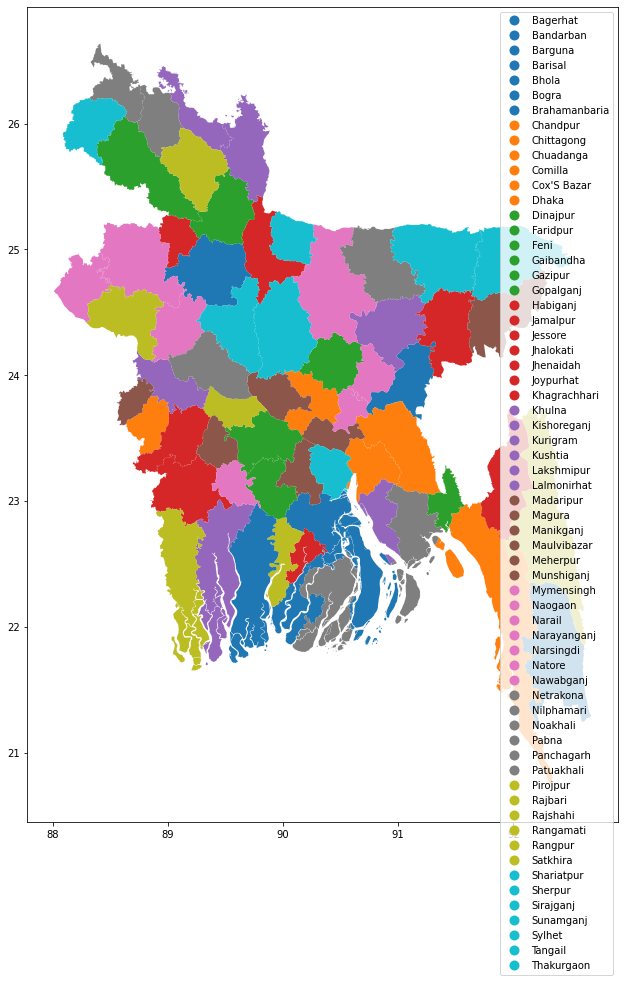

In [16]:
# Check 
fig, ax = plt.subplots(figsize = (15,15))
df_shp.plot(column = 'NAME_2', legend = True, ax=ax)

In [17]:
# Overview over districts.
print(len(df_shp.NAME_2.unique()))
df_shp.NAME_2.unique()

64


array(['Barguna', 'Barisal', 'Bhola', 'Jhalokati', 'Patuakhali',
       'Pirojpur', 'Bandarban', 'Brahamanbaria', 'Chandpur', 'Chittagong',
       'Comilla', "Cox'S Bazar", 'Feni', 'Khagrachhari', 'Lakshmipur',
       'Noakhali', 'Rangamati', 'Dhaka', 'Faridpur', 'Gazipur',
       'Gopalganj', 'Jamalpur', 'Kishoreganj', 'Madaripur', 'Manikganj',
       'Munshiganj', 'Mymensingh', 'Narayanganj', 'Narsingdi',
       'Netrakona', 'Rajbari', 'Shariatpur', 'Sherpur', 'Tangail',
       'Bagerhat', 'Chuadanga', 'Jessore', 'Jhenaidah', 'Khulna',
       'Kushtia', 'Magura', 'Meherpur', 'Narail', 'Satkhira', 'Bogra',
       'Joypurhat', 'Naogaon', 'Natore', 'Nawabganj', 'Pabna', 'Rajshahi',
       'Sirajganj', 'Dinajpur', 'Gaibandha', 'Kurigram', 'Lalmonirhat',
       'Nilphamari', 'Panchagarh', 'Rangpur', 'Thakurgaon', 'Habiganj',
       'Maulvibazar', 'Sunamganj', 'Sylhet'], dtype=object)

In [18]:
# Compare district names. 
print('Names match between dfs:', set(df_xsub.NAME_2.unique()) == set(df_shp.NAME_2.unique()))
print('Names df_shp', sorted(set(df_shp.NAME_2.unique()) - set(df_xsub.NAME_2.unique())))
print('Names df_xsub', sorted(set(df_xsub.NAME_2.unique()) - set(df_shp.NAME_2.unique())))

# Nasirabad, Parbattya Chattagram do not match - they can be found in df_xsub but not in df_shp

Names match between dfs: False
Names df_shp ['Bandarban', 'Barguna', 'Brahamanbaria', 'Chuadanga', "Cox'S Bazar", 'Gaibandha', 'Gopalganj', 'Habiganj', 'Jhalokati', 'Joypurhat', 'Khagrachhari', 'Kushtia', 'Manikganj', 'Maulvibazar', 'Munshiganj', 'Mymensingh', 'Narayanganj', 'Narsingdi', 'Rangamati', 'Rangpur', 'Satkhira', 'Sirajganj', 'Sunamganj']
Names df_xsub ['Bandarbon', 'Borgona', 'Brahmanbaria', 'Choua Danga', "Cox's Bazar", 'Gaibanda', 'Gopalgonj', 'Hobiganj', 'Jaipurhat', 'Jhalakati', 'Khagrachari', 'Kustia', 'Manikgonj', 'Moulvibazar', 'Munshigonj', 'Naray Angonj', 'Narshingdi', 'Nasirabad', 'Parbattya Chattagram', 'Rongpur', 'Shatkhira', 'Sirajgonj', 'Sun Amgonj']


In [19]:
# Rename all apart from Nasirabad, Parbattya Chattagram
df_xsub.NAME_2.replace({
    'Bandarbon':'Bandarban',
    'Borgona':'Barguna',
    'Brahmanbaria':'Brahamanbaria',
    'Choua Danga':'Chuadanga',
    "Cox's Bazar":"Cox'S Bazar",
    'Gaibanda':'Gaibandha',
    'Gopalgonj':'Gopalganj',
    'Hobiganj':'Habiganj',
    'Jaipurhat':'Joypurhat',
    'Jhalakati':'Jhalokati',
    'Khagrachari':'Khagrachhari',
    'Kustia':'Kushtia',
    'Manikgonj':'Manikganj',
    'Moulvibazar':'Maulvibazar',
    'Munshigonj':'Munshiganj',
    'Naray Angonj':'Narayanganj',
    'Narshingdi':'Narsingdi',
    'Rongpur':'Rangpur',
    'Shatkhira':'Satkhira',
    'Sirajgonj':'Sirajganj',
    'Sun Amgonj':'Sunamganj',
}, inplace=True)

print('Names df_shp', sorted(set(df_shp.NAME_2.unique()) - set(df_xsub.NAME_2.unique())))
print('Names df_xsub', sorted(set(df_xsub.NAME_2.unique()) - set(df_shp.NAME_2.unique())))


Names df_shp ['Mymensingh', 'Rangamati']
Names df_xsub ['Nasirabad', 'Parbattya Chattagram']


/var/folders/4_/5tykrfk16l3_j0dx711k_cq00000gp/T/ipykernel_77704/2484670814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xsub.NAME_2.replace({


In [20]:
# Replace names. 

df_xsub.NAME_2.replace({
    'Nasirabad':'Mymensingh', # Mymensingh was formerly called Nasirabad
    'Parbattya Chattagram':'Rangamati', # Only one missing.
}, inplace=True)

print('Names match between dfs:', set(df_xsub.NAME_2.unique()) == set(df_shp.NAME_2.unique()))
print('Names df_shp', sorted(set(df_shp.NAME_2.unique()) - set(df_xsub.NAME_2.unique())))
print('Names df_xsub', sorted(set(df_xsub.NAME_2.unique()) - set(df_shp.NAME_2.unique())))

Names match between dfs: True
Names df_shp []
Names df_xsub []


/var/folders/4_/5tykrfk16l3_j0dx711k_cq00000gp/T/ipykernel_77704/1962154613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xsub.NAME_2.replace({


In [21]:
# Merge shapefile with df

df_shp = df_shp[['NAME_2','geometry']]
df_xsub_m = df_xsub.reset_index().merge(df_shp, on='NAME_2', how='left')
gdf_xsub = gpd.GeoDataFrame(df_xsub_m, geometry='geometry')

gdf_xsub

,YRMO,ID_2,NAME_2,PG_GCP_PPP_LI,year,yrmo,geometry
0,198901,1,Barisal,0.000000,1989,1989-01,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22..."
1,198902,1,Barisal,0.000000,1989,1989-02,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22..."
2,198903,1,Barisal,0.000000,1989,1989-03,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22..."
3,198904,1,Barisal,0.000000,1989,1989-04,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22..."
4,198905,1,Barisal,0.000000,1989,1989-05,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22..."
...,...,...,...,...,...,...,...
23803,201908,64,Sylhet,1.808422,2019,2019-08,"POLYGON ((92.38098 24.86759, 92.37892 24.86787..."
23804,201909,64,Sylhet,1.808422,2019,2019-09,"POLYGON ((92.38098 24.86759, 92.37892 24.86787..."
23805,201910,64,Sylhet,1.808422,2019,2019-10,"POLYGON ((92.38098 24.86759, 92.37892 24.86787..."
23806,201911,64,Sylhet,1.808422,2019,2019-11,"POLYGON ((92.38098 24.86759, 92.37892 24.86787..."


In [22]:
# Drop YRMO
gdf_xsub = gdf_xsub.drop(['YRMO'],axis=1)

#### Spatial trasnformations

In [23]:
def spatial_lag(
    gdf: gpd.GeoDataFrame, 
    gdf_geom: gpd.GeoDataFrame, 
    groupby: str,
    col: str,
):
    """ Compute spatial lag on col in gdf """

    def gdf_to_w_q(gdf_geom: gpd.GeoDataFrame):
        """Build queen weights from gdf.
        """
        # Compute first order spatial weight
        w = lps.weights.Queen.from_dataframe(gdf_geom, geom_col="geometry")

        return w

    def _splag(y: Any, w: Any):
        """ Flip argument order for transform """
        return lps.weights.lag_spatial(w, y)
    
    w = gdf_to_w_q(gdf_geom)
    s = gdf.groupby(groupby)[col].transform(_splag, w=w)
    return s

In [24]:
# Check queen weights
if False:
    save_fig = True 

    skeleton = gdf_xsub[gdf_xsub.YRMO == 201801]
    skeleton['new'] = range(0, len(skeleton))
    skeleton = skeleton.set_index('new')
    sk_weights = lps.weights.Queen.from_dataframe(skeleton, geom_col="geometry")

    #Plot 
    plt.rcParams["figure.figsize"] = (20,8)
    ax = skeleton.plot(edgecolor='grey', facecolor='w')
    f,ax = sk_weights.plot(skeleton, ax=ax,
            edge_kws=dict(color='r', linestyle=':', linewidth=1),
            node_kws=dict(marker=''))
    ax.set_axis_off()

    if save_fig:
        f.savefig(os.path.join(output_path,f'queen_weights_map.png'), bbox_inches="tight", dpi=400, transparent=False)
        print(f"Wrote {path}.")
        plt.show(fig)

Information that exists in the xSub df is:

    - DIST2PROVCAP: Distance to nearest provincial capital (km) (is useless)
    - DIST2CAP: Distance to national capital (km)

In [25]:
if False:
    # Plotting provinces 
    fig, ax = plt.subplots(figsize = (10,10))
    gdf_xsub[gdf_xsub.year==2012].plot(column = 'NAME_1', legend = False, ax=ax)

In [26]:
if False:
    # Plotting districts 
    fig, ax = plt.subplots(figsize = (10,10))
    gdf_xsub[gdf_xsub.year==2012].plot(column = 'NAME_2', legend = False, ax=ax)

### World Food prices
Can't use data becuase it only includes markest in all district for after 2020

In [27]:
if False:
    # Read data
    df_wfp = pd.read_csv(os.path.join(input_paths['wfp_food'], 'wfp_food_prices_bgd.csv'), header=0)
    df_wfp = df_wfp.iloc[1: , :]
    df_wfp

In [28]:
if False:
    # Districts included 

    # Subset time
    df_wfp['date'] = pd.to_datetime(df_wfp['date'], format='%Y-%m-%d')
    df_wfp['year'] = df_wfp['date'].dt.year
    df_wfp['month'] = df_wfp['date'].dt.month


    print('For full dataframe:', df_wfp.admin2.unique())
    print('For before 2020', df_wfp[df_wfp.year<2020].admin2.unique())

### GDIS - Geocoded Disasters 

For more information https://www.nature.com/articles/s41597-021-00846-6#additional-information

Note: might adjust this when we code for additional years

In [29]:
# Read df
df_gdis = pd.read_csv(os.path.join(input_paths['gdis'], 'pend-gdis-1960-2018-disasterlocations.csv'), header=0)
df_gdis

,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,2009-0631,42.020948,19.418317
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,2009-0631,41.959294,19.514309
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,2001-0146,-17.093484,15.665758
3,187,Angola,AGO,540.0,2009,710,Evale,3,Cunene,Cuanhama,Evale,Evale,0,NaN,flood,2009-0092,-16.531533,15.773987
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Cunene,Cuvelai,Mupa,Mupa,0,NaN,flood,2009-0092,-16.200065,15.844189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39948,Jun-94,Dominica,NaN,NaN,2015,45253,Saint Patrick,1,Saint Patrick,NaN,NaN,St. Patrick province,1,NaN,storm,2015-0375,15.282063,-61.291589
39949,Jun-94,Dominica,NaN,NaN,2015,45254,Saint Andrew,1,Saint Andrew,NaN,NaN,St. Andrew province,1,NaN,storm,2015-0375,15.541065,-61.350601
39950,Jun-94,Dominica,NaN,NaN,2015,45255,Saint George,1,Saint George,NaN,NaN,St. George province,1,NaN,storm,2015-0375,15.308003,-61.343527
39951,Jun-94,Dominica,NaN,NaN,2015,45256,Saint David,1,Saint David,NaN,NaN,St. David province,1,NaN,storm,2015-0375,15.413059,-61.282094


In [30]:
# Check out disastertypes
df_gdis.disastertype.unique()

array(['flood', 'storm', 'earthquake', 'extreme temperature ',
       'landslide', 'volcanic activity', 'drought', 'mass movement (dry)'],
      dtype=object)

In [31]:
# Filter Bangladesh and limit period
df_gdis = df_gdis[df_gdis.country=='Bangladesh']
df_gdis = df_gdis[df_gdis.year>=1989]
df_gdis

,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude
8,527,Bangladesh,BGD,771.0,1995,1875,Hatiya,3,Chittagong,Noakhali,Hatiya,Hatiya,0,NaN,storm,1995-0082,22.291591,91.065456
9,533,Bangladesh,BGD,771.0,1996,1865,Ghatail,3,Dhaka,Tangail,Ghatail,Ghatail,0,NaN,storm,1996-0086,24.467312,90.052856
10,533,Bangladesh,BGD,771.0,1996,1872,Gopalpur,3,Dhaka,Tangail,Gopalpur,Gopalpur,0,NaN,storm,1996-0086,24.574008,89.901174
11,533,Bangladesh,BGD,771.0,1996,1916,Kalihati,3,Dhaka,Tangail,Kalihati,Kalihati,0,NaN,storm,1996-0086,24.352354,89.941713
12,533,Bangladesh,BGD,771.0,1996,2004,Mirzapur,3,Dhaka,Tangail,Mirzapur,Mirzapur,0,NaN,storm,1996-0086,24.113306,90.106433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37374,May-43,Bangladesh,BNG,771.0,2009,41624,Sylhet,1,Sylhet,NaN,NaN,Sylhet provinces,0,NaN,drought,2009-9323,24.715343,91.663729
37375,May-43,Bangladesh,BNG,771.0,2009,41625,Chittagong,1,Chittagong,NaN,NaN,Chittagong,0,NaN,drought,2009-9323,22.712080,91.730275
37376,May-43,Bangladesh,BNG,771.0,2009,41626,Dhaka,1,Dhaka,NaN,NaN,Dhaka,0,NaN,drought,2009-9323,24.182800,90.289567
37377,May-43,Bangladesh,BNG,771.0,2009,41627,Rangpur,1,Rangpur,NaN,NaN,Rangpur,0,NaN,drought,2009-9323,25.777895,89.055952


In [32]:
# Check 
df_gdis.groupby(['year','disastertype']).aggregate({'geo_id':pd.Series.nunique})

geo_id
year disastertype                
1989 earthquake                 1
     flood                      3
     storm                      4
1990 flood                      6
     storm                      4
...                           ...
2017 flood                     35
     landslide                  6
     storm                     12
2018 extreme temperature        4
     flood                      2

[84 rows x 1 columns]

In [33]:
# Show columns
df_gdis.columns

Index(['id', 'country', 'iso3', 'gwno', 'year', 'geo_id', 'geolocation',
       'level', 'adm1', 'adm2', 'adm3', 'location', 'historical',
       'hist_country', 'disastertype', 'disasterno', 'latitude', 'longitude'],
      dtype='object')

In [34]:
# Check out precision of the events. In 12 the precision is coarser than admin 2. 
len(df_gdis[df_gdis.level<2])/len(df_gdis)

0.12382075471698113

In [35]:
# Read emdat data to connect to months
df_emdat = pd.read_excel(os.path.join(input_paths['gdis'], 'emdat_public_2022_11_28_query_uid-CYU5wJ.xlsx'),header=6)
df_emdat

/Users/maxle647/miniconda3/envs/displacement_hh_bangladesh_env/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1989-0016-BGD,1989,16,NaN,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,...,NaN,NaN,NaN,16200.0,35410.0,45.749276,NaN,NaN,NaN,NaN
1,1989-0071-BGD,1989,71,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.749276,NaN,NaN,NaN,NaN
2,1989-0119-BGD,1989,119,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.749276,NaN,NaN,NaN,NaN
3,1989-0249-BGD,1989,249,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.749276,NaN,NaN,NaN,NaN
4,1989-0222-BGD,1989,222,NaN,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.749276,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2019-0304-BGD,2019,304,NaN,Natural,Hydrological,Landslide,Landslide,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,94.349092,2,NaN,5772,Cox's Bazar (Adm2).
211,2019-0164-BGD,2019,164,2019-000134,Natural,Meteorological,Storm,Tropical cyclone,NaN,Cyclone 'Fani',...,NaN,NaN,NaN,NaN,NaN,94.349092,2,NaN,5761;5762;5763;5764;5765;5766;5769;5773;5775;5...,"Bagerhat, Barguna, Barisal, Bhola, Chandpur, F..."
212,2019-0337-BGD,2019,337,FL-2019-000079,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,75000.0,79492.0,94.349092,2,NaN,5768;5769;5772;5773;5774;5779;5782;5784;5785;5...,"Bogra, Brahamanbaria, Chandpur, Cox's Bazar, F..."
213,2019-0550-BGD,2019,550,TC-2019-000147,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Bulbul',...,NaN,NaN,NaN,5785.0,6131.0,94.349092,2,NaN,5761;5763;5765;5766;5795;5799;5804,"Bagerhat, Barguna, Bhola, Khulna, Patuakhali, ..."


In [36]:
# Show columns
df_emdat.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [37]:
# Filter columns
df_emdat = df_emdat[[
    'Dis No',
    'Year',
    'Start Year',
    'End Year',
    'Start Month',
    'End Month',
]]
df_emdat 

,Dis No,Year,Start Year,End Year,Start Month,End Month
0,1989-0016-BGD,1989,1989,1989,4,4.0
1,1989-0071-BGD,1989,1989,1989,6,6.0
2,1989-0119-BGD,1989,1989,1989,8,8.0
3,1989-0249-BGD,1989,1989,1989,5,5.0
4,1989-0222-BGD,1989,1989,1989,12,12.0
...,...,...,...,...,...,...
210,2019-0304-BGD,2019,2019,2019,7,7.0
211,2019-0164-BGD,2019,2019,2019,5,5.0
212,2019-0337-BGD,2019,2019,2019,6,7.0
213,2019-0550-BGD,2019,2019,2019,11,11.0


In [38]:
# Merge with gdis

## Rename column to merge on with GDIS
df_emdat = df_emdat.rename(columns={'Dis No':'disasterno'})
df_emdat.disasterno = df_emdat.disasterno.str.rstrip('-BGD').astype(str)
df_gdis = df_gdis.astype(str)

# Join
df_gdis_j = df_gdis.merge(df_emdat,how='left', on='disasterno')

#df_gdis_j_nona = df_gdis_j.dropna()
print('Numbers of rows after join equals number of rows before join:', len(df_gdis) == len(df_gdis_j))
print('Existing rows where years do not match:', list(df_gdis_j.year.astype(int))!=list(df_gdis_j.Year.astype(int)))
df_gdis_j

Numbers of rows after join equals number of rows before join: True
Existing rows where years do not match: False


,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,...,hist_country,disastertype,disasterno,latitude,longitude,Year,Start Year,End Year,Start Month,End Month
0,527,Bangladesh,BGD,771.0,1995,1875,Hatiya,3,Chittagong,Noakhali,...,nan,storm,1995-0082,22.29159078,91.0654556,1995,1995,1995,5,5.0
1,533,Bangladesh,BGD,771.0,1996,1865,Ghatail,3,Dhaka,Tangail,...,nan,storm,1996-0086,24.4673118,90.05285629,1996,1996,1996,5,5.0
2,533,Bangladesh,BGD,771.0,1996,1872,Gopalpur,3,Dhaka,Tangail,...,nan,storm,1996-0086,24.5740082,89.9011743,1996,1996,1996,5,5.0
3,533,Bangladesh,BGD,771.0,1996,1916,Kalihati,3,Dhaka,Tangail,...,nan,storm,1996-0086,24.35235401,89.94171335,1996,1996,1996,5,5.0
4,533,Bangladesh,BGD,771.0,1996,2004,Mirzapur,3,Dhaka,Tangail,...,nan,storm,1996-0086,24.11330631,90.10643338,1996,1996,1996,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,May-43,Bangladesh,BNG,771.0,2009,41624,Sylhet,1,Sylhet,nan,...,nan,drought,2009-9323,24.71534264,91.6637289,2009,2009,2009,7,8.0
844,May-43,Bangladesh,BNG,771.0,2009,41625,Chittagong,1,Chittagong,nan,...,nan,drought,2009-9323,22.71208045,91.73027541,2009,2009,2009,7,8.0
845,May-43,Bangladesh,BNG,771.0,2009,41626,Dhaka,1,Dhaka,nan,...,nan,drought,2009-9323,24.18280032,90.28956697,2009,2009,2009,7,8.0
846,May-43,Bangladesh,BNG,771.0,2009,41627,Rangpur,1,Rangpur,nan,...,nan,drought,2009-9323,25.77789514,89.05595214,2009,2009,2009,7,8.0


In [39]:
# Fix column names
df_gdis_j = df_gdis_j.add_prefix('gdis_')
df_gdis_j = df_gdis_j.drop(columns=[
    'gdis_gwno',
    'gdis_iso3',
    'gdis_country',
    'gdis_id',
    'gdis_level',
    'gdis_hist_country',
    'gdis_historical',
    'gdis_Year'
])
df_gdis_j.columns = df_gdis_j.columns.str.lower()
df_gdis_j.columns = df_gdis_j.columns.str.replace(' ', '_')

In [40]:
# Check missing geo-location
print('Admin 1 missing in %:', len(df_gdis_j[df_gdis_j.gdis_adm1=='nan'])/len(df_gdis_j.gdis_adm2)) # 12 % 

print('Admin 2 missing:', len(df_gdis_j[df_gdis_j.gdis_adm2=='nan']))
print('Admin 2 missing in %:', len(df_gdis_j[df_gdis_j.gdis_adm2=='nan'])/len(df_gdis_j.gdis_adm2)) # 12 % 
print('Admin 3 missing:', len(df_gdis_j[df_gdis_j.gdis_adm3=='nan'])) # 547 
print('Admin 3 missing in %:', len(df_gdis_j[df_gdis_j.gdis_adm3=='nan'])/len(df_gdis_j.gdis_adm3)) # 88 % 

Admin 1 missing in %: 0.0
Admin 2 missing: 105
Admin 2 missing in %: 0.12382075471698113
Admin 3 missing: 747
Admin 3 missing in %: 0.8808962264150944


In [41]:
# Note that for data included in our study, this affects only 5%
test = df_gdis_j[df_gdis_j.gdis_year.astype(int)>2010]
len(test[test.gdis_adm2=='nan'])/len(test.gdis_adm2)

0.05952380952380952

In [42]:
# Create variable with dummy for missingnes
df_gdis_j['gdis_adm2_na'] = df_gdis_j.gdis_adm2.copy()
df_gdis_j['gdis_adm2_na'] = np.where(df_gdis_j['gdis_adm2_na'] == 'nan', 1, 0)
df_gdis_j['gdis_adm2_na']

0      0
1      0
2      0
3      0
4      0
      ..
843    1
844    1
845    1
846    1
847    0
Name: gdis_adm2_na, Length: 848, dtype: int64

In [43]:
# Print missing geo-locations
print(len(df_gdis_j[df_gdis_j.gdis_adm2=='nan']['gdis_location'].unique()))
df_gdis_j[df_gdis_j.gdis_adm2=='nan']['gdis_location'].unique()

42


array(['Sylhet', 'Sylhet district', 'Rangpur', 'Rajshai', 'Rajshahi Div',
       'Rangpur district', 'Keranirhat', 'Rajshahi district',
       'Rangpur region', 'Rajshahi', 'Chittagong', 'North Dhaka', 'Dhaka',
       'Begumgang', 'Barisal', 'Khulna', 'Padma',
       'Bay Of Bengal  Chittagong', 'Maheshkhali Island', 'Jamuna',
       'Gournadi', 'Dacca', "Chittagong-Cox's Bazar-Rangamati", 'Hatia',
       'Chittagong area', 'Rajskabi division',
       'Barisal district and Southern Bangladesh', ' Rajshahi',
       ' Rajshahi district ', ' Level 1 = Rajshahi', ' Chittagong',
       ' Dhaka', ' Rangpur', ' Sylhet provinces', ' Khulna',
       ' Rangpur provinces', ' Rajshahi provinces', 'Chittagong province',
       'Khulna province', ' Srimangal andChuadanga regions',
       ' Rajshahi divisions', 'Chittagong district'], dtype=object)

In [44]:
# Print missing gdis-geolocations
df_gdis_j[df_gdis_j.gdis_adm2=='nan']['gdis_geolocation'].unique()

array(['Sylhet', 'Rangpur', 'Rajshahi', 'Chittagong', 'Dhaka', 'Barisal',
       'Khulna'], dtype=object)

In [45]:
# Replace with more precise from gdis location
df_gdis_j['gdis_adm2'] = np.where(df_gdis_j['gdis_location'] == 'Begumgang', 'Chittagong', df_gdis_j['gdis_adm2'])
df_gdis_j['gdis_adm2'] = np.where(df_gdis_j['gdis_location'] == 'Gournadi', 'Barisal', df_gdis_j['gdis_adm2'])
df_gdis_j['gdis_adm2'] = np.where(df_gdis_j['gdis_location'] == 'Hatia', 'Noakhali', df_gdis_j['gdis_adm2'])
df_gdis_j['gdis_adm2'] = np.where(df_gdis_j['gdis_location'] == 'Keranirhat', 'Chittagong', df_gdis_j['gdis_adm2'])
df_gdis_j['gdis_adm2'] = np.where(df_gdis_j['gdis_location'] == 'Maheshkhali Island', "Cox'S Bazar", df_gdis_j['gdis_adm2'])
df_gdis_j['gdis_adm2'] = np.where(df_gdis_j['gdis_location'] == 'Barisal district and Southern Bangladesh', "Barisal", df_gdis_j['gdis_adm2'])
df_gdis_j['gdis_adm2'] = np.where(df_gdis_j['gdis_location'] == ' Srimangal andChuadanga regions', "Moulvibazar,Chuadanga", df_gdis_j['gdis_adm2'])
df_gdis_j['gdis_adm2'] = np.where(df_gdis_j['gdis_location'] == "Chittagong-Cox's Bazar-Rangamati", "Chittagong,Cox'S Bazar,Rangamati", df_gdis_j['gdis_adm2'])
df_gdis_j['gdis_adm2'] = np.where(df_gdis_j['gdis_location'] == "Padma", 'Munshiganj,Pabna,Manikganj,Rajshahi,Kushtia,Nawabganj,Faridpur,Madaripur,Rajbari,Shariatpu,Chandpur', df_gdis_j['gdis_adm2'])

In [46]:
# Explode.
df_gdis_j=df_gdis_j.assign(gdis_adm2=df_gdis_j.gdis_adm2.str.split(",")).explode('gdis_adm2') 

In [47]:
# Drop due to imprecision being too extreme
df_gdis_j = df_gdis_j[df_gdis_j['gdis_location'] != 'Rajskabi division']
df_gdis_j = df_gdis_j[df_gdis_j['gdis_location'] != 'Jamuna']

In [48]:
print(len(df_gdis_j[df_gdis_j.gdis_adm2=='nan']['gdis_location'].unique()))
df_gdis_j[df_gdis_j.gdis_adm2=='nan']['gdis_location'].unique()

31


array(['Sylhet', 'Sylhet district', 'Rangpur', 'Rajshai', 'Rajshahi Div',
       'Rangpur district', 'Rajshahi district', 'Rangpur region',
       'Rajshahi', 'Chittagong', 'North Dhaka', 'Dhaka', 'Barisal',
       'Khulna', 'Bay Of Bengal  Chittagong', 'Dacca', 'Chittagong area',
       ' Rajshahi', ' Rajshahi district ', ' Level 1 = Rajshahi',
       ' Chittagong', ' Dhaka', ' Rangpur', ' Sylhet provinces',
       ' Khulna', ' Rangpur provinces', ' Rajshahi provinces',
       'Chittagong province', 'Khulna province', ' Rajshahi divisions',
       'Chittagong district'], dtype=object)

In [49]:
df_gdis_j[df_gdis_j.gdis_adm2=='nan']['gdis_adm1'].unique()

array(['Sylhet', 'Rangpur', 'Rajshahi', 'Chittagong', 'Dhaka', 'Barisal',
       'Khulna'], dtype=object)

In [50]:
# Check missing geo-location
print('Admin 2 missing:', len(df_gdis_j[df_gdis_j.gdis_adm2=='nan']))
print('Admin 2 missing in %:', len(df_gdis_j[df_gdis_j.gdis_adm2=='nan'])/len(df_gdis_j.gdis_adm2)) # 10% 

Admin 2 missing: 94
Admin 2 missing in %: 0.10942956926658906


In [51]:
# Replace with Names from Admin 1 (rename first)
df_gdis_j.replace({'gdis_adm1': {
    "Sylhet": "Sylhet ad1",
    "Rajshahi": "Rajshahi ad1",
    'Rangpur': 'Rangpur ad1',
    'Chittagong': "Chittagong ad1",
    'Khulna': 'Khulna ad1',
    'Dhaka': 'Dhaka ad1',
    'Barisal': 'Barisal ad1',
}}, inplace = True)

In [52]:
df_gdis_j[df_gdis_j.gdis_adm2=='nan']['gdis_adm1'].unique()

array(['Sylhet ad1', 'Rangpur ad1', 'Rajshahi ad1', 'Chittagong ad1',
       'Dhaka ad1', 'Barisal ad1', 'Khulna ad1'], dtype=object)

In [53]:
# Replace with Names from Admin 1 
df_gdis_j['gdis_adm2'] = np.where(df_gdis_j['gdis_adm2'] == 'nan', df_gdis_j['gdis_adm1'], df_gdis_j['gdis_adm2'])

In [54]:
# Replace affected divisions with all districts included (?)
## Rename to include districts

df_gdis_j.replace({'gdis_adm2': {
    "Sylhet ad1": "Habiganj,Moulvibazar,Sunamganj,Sylhet",
    "Rajshahi ad1": "Rajshahi,Sirajganj,Pabna,Bogura,Chapainawabganj,Naogaon,Joypurhat,Natore",
    'Rangpur ad1': 'Dinajpur,Kurigram,Gaibandha,Lalmonirhat,Nilphamari,Panchagarh,Rangpur,Thakurgaon',
    'Chittagong ad1': "Brahmanbaria,Comilla,Chandpur,Lakshmipur,Noakhali,Feni,Comilla,Khagrachhari,Rangamati,Bandarban,Chittagong,Cox's Bazar",
    'Khulna ad1': 'Bagerhat,Chuadanga,Jashore,Jhenaidah,Khulna,Kushtia,Magura,Meherpur,Narail,Satkhira',
    'Dhaka ad1': 'Dhaka,Gazipur,Kishoreganj,Manikganj,Munshiganj,Narayanganj,Narsingdi,Tangail,Faridpur,Gopalganj,Madaripur,Rajbari,Shariatpur',
    'Barisal ad1': 'Barisal,Barguna,Bhola,Jhalokati,Patuakhali,Pirojpur',
}}, inplace = True)

In [55]:
## Multiplicate
df_gdis_j=df_gdis_j.assign(gdis_adm2=df_gdis_j.gdis_adm2.str.split(",")).explode('gdis_adm2') 

In [56]:
# Check missing geo-location
print('Admin 2 missing:', len(df_gdis_j[df_gdis_j.gdis_adm2=='nan']))
print('Admin 2 missing in %:', len(df_gdis_j[df_gdis_j.gdis_adm2=='nan'])/len(df_gdis_j.gdis_adm2)) # 10% 

Admin 2 missing: 0
Admin 2 missing in %: 0.0


In [57]:
# Check
df_gdis_j

,gdis_year,gdis_geo_id,gdis_geolocation,gdis_adm1,gdis_adm2,gdis_adm3,gdis_location,gdis_disastertype,gdis_disasterno,gdis_latitude,gdis_longitude,gdis_start_year,gdis_end_year,gdis_start_month,gdis_end_month,gdis_adm2_na
0,1995,1875,Hatiya,Chittagong ad1,Noakhali,Hatiya,Hatiya,storm,1995-0082,22.29159078,91.0654556,1995,1995,5,5.0,0
1,1996,1865,Ghatail,Dhaka ad1,Tangail,Ghatail,Ghatail,storm,1996-0086,24.4673118,90.05285629,1996,1996,5,5.0,0
2,1996,1872,Gopalpur,Dhaka ad1,Tangail,Gopalpur,Gopalpur,storm,1996-0086,24.5740082,89.9011743,1996,1996,5,5.0,0
3,1996,1916,Kalihati,Dhaka ad1,Tangail,Kalihati,Kalihati,storm,1996-0086,24.35235401,89.94171335,1996,1996,5,5.0,0
4,1996,2004,Mirzapur,Dhaka ad1,Tangail,Mirzapur,Mirzapur,storm,1996-0086,24.11330631,90.10643338,1996,1996,5,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,2009,41627,Rangpur,Rangpur ad1,Nilphamari,nan,Rangpur,drought,2009-9323,25.77789514,89.05595214,2009,2009,7,8.0,1
846,2009,41627,Rangpur,Rangpur ad1,Panchagarh,nan,Rangpur,drought,2009-9323,25.77789514,89.05595214,2009,2009,7,8.0,1
846,2009,41627,Rangpur,Rangpur ad1,Rangpur,nan,Rangpur,drought,2009-9323,25.77789514,89.05595214,2009,2009,7,8.0,1
846,2009,41627,Rangpur,Rangpur ad1,Thakurgaon,nan,Rangpur,drought,2009-9323,25.77789514,89.05595214,2009,2009,7,8.0,1


In [58]:
# Fix date to expand.
df_gdis_j.gdis_year = df_gdis_j.gdis_year.astype(int)
df_gdis_j.gdis_start_month = df_gdis_j.gdis_start_month.astype(int)
df_gdis_j = df_gdis_j.rename(columns={'gdis_start_year':'year','gdis_start_month':'month'})

df_gdis_j['yrmo_start'] = pd.to_datetime(df_gdis_j[['year', 'month']].assign(DAY=1)).dt.strftime('%Y-%m')
df_gdis_j = df_gdis_j.drop(columns=['month','year'])

df_gdis_j.gdis_end_month = df_gdis_j.gdis_end_month.astype(int)
df_gdis_j = df_gdis_j.rename(columns={'gdis_end_year':'year','gdis_end_month':'month'})

df_gdis_j['yrmo_end'] = pd.to_datetime(df_gdis_j[['year', 'month']].assign(DAY=1)).dt.strftime('%Y-%m').drop(columns=['month'])
df_gdis_j = df_gdis_j.drop(columns=['month','year'])

In [59]:
# Expand df. 
df_gdis_j['dateindx'] = df_gdis_j.apply(lambda x: pd.date_range(start=x['yrmo_start'], end=x['yrmo_end'], freq='MS'),axis=1)
df_gdis_j=df_gdis_j.explode('dateindx')
df_gdis_j['yrmo'] = df_gdis_j.dateindx.dt.strftime('%Y-%m')
df_gdis_j = df_gdis_j.reset_index().drop('index',axis=1)
df_gdis_j

,gdis_year,gdis_geo_id,gdis_geolocation,gdis_adm1,gdis_adm2,gdis_adm3,gdis_location,gdis_disastertype,gdis_disasterno,gdis_latitude,gdis_longitude,gdis_adm2_na,yrmo_start,yrmo_end,dateindx,yrmo
0,1995,1875,Hatiya,Chittagong ad1,Noakhali,Hatiya,Hatiya,storm,1995-0082,22.29159078,91.0654556,0,1995-05,1995-05,1995-05-01,1995-05
1,1996,1865,Ghatail,Dhaka ad1,Tangail,Ghatail,Ghatail,storm,1996-0086,24.4673118,90.05285629,0,1996-05,1996-05,1996-05-01,1996-05
2,1996,1872,Gopalpur,Dhaka ad1,Tangail,Gopalpur,Gopalpur,storm,1996-0086,24.5740082,89.9011743,0,1996-05,1996-05,1996-05-01,1996-05
3,1996,1916,Kalihati,Dhaka ad1,Tangail,Kalihati,Kalihati,storm,1996-0086,24.35235401,89.94171335,0,1996-05,1996-05,1996-05-01,1996-05
4,1996,2004,Mirzapur,Dhaka ad1,Tangail,Mirzapur,Mirzapur,storm,1996-0086,24.11330631,90.10643338,0,1996-05,1996-05,1996-05-01,1996-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2009,41627,Rangpur,Rangpur ad1,Rangpur,nan,Rangpur,drought,2009-9323,25.77789514,89.05595214,1,2009-07,2009-08,2009-07-01,2009-07
2180,2009,41627,Rangpur,Rangpur ad1,Rangpur,nan,Rangpur,drought,2009-9323,25.77789514,89.05595214,1,2009-07,2009-08,2009-08-01,2009-08
2181,2009,41627,Rangpur,Rangpur ad1,Thakurgaon,nan,Rangpur,drought,2009-9323,25.77789514,89.05595214,1,2009-07,2009-08,2009-07-01,2009-07
2182,2009,41627,Rangpur,Rangpur ad1,Thakurgaon,nan,Rangpur,drought,2009-9323,25.77789514,89.05595214,1,2009-07,2009-08,2009-08-01,2009-08


In [60]:
# Compare district names to merge with other data
print('Names match between dfs:', set(df_gdis_j.gdis_adm2.unique()) == set(gdf_xsub.NAME_2.unique()))
print('Names df_gdis_j', sorted(set(df_gdis_j.gdis_adm2.unique()) - set(gdf_xsub.NAME_2.unique())))
print('Names df_xsub', sorted(set(gdf_xsub.NAME_2.unique()) - set(df_gdis_j.gdis_adm2.unique())))

Names match between dfs: False
Names df_gdis_j ['Bogura', 'Borgona', 'Brahmanbaria', 'Chapainawabganj', "Cox's Bazar", 'Jashore', 'Moulvibazar', 'Shariatpu', 'Shatkhira']
Names df_xsub []


In [61]:
# What is Chpainawabganj? It is the same as Nawabganj
if False:
    gdf_xsub[gdf_xsub.NAME_1 == 'Rajshahi'].plot(column='NAME_2',legend=True)

In [62]:
gdf_xsub.NAME_2.unique()

array(['Barisal', 'Bhola', 'Barguna', 'Jhalokati', 'Patuakhali',
       'Pirojpur', 'Bandarban', 'Brahamanbaria', 'Chandpur', 'Chittagong',
       'Comilla', "Cox'S Bazar", 'Feni', 'Khagrachhari', 'Lakshmipur',
       'Noakhali', 'Rangamati', 'Dhaka', 'Faridpur', 'Gazipur',
       'Gopalganj', 'Jamalpur', 'Kishoreganj', 'Madaripur', 'Manikganj',
       'Munshiganj', 'Narayanganj', 'Narsingdi', 'Mymensingh',
       'Netrakona', 'Rajbari', 'Shariatpur', 'Sherpur', 'Tangail',
       'Bagerhat', 'Chuadanga', 'Jessore', 'Jhenaidah', 'Khulna',
       'Kushtia', 'Magura', 'Meherpur', 'Narail', 'Satkhira', 'Bogra',
       'Joypurhat', 'Naogaon', 'Natore', 'Nawabganj', 'Pabna', 'Rajshahi',
       'Sirajganj', 'Dinajpur', 'Gaibandha', 'Kurigram', 'Lalmonirhat',
       'Nilphamari', 'Panchagarh', 'Rangpur', 'Thakurgaon', 'Habiganj',
       'Maulvibazar', 'Sunamganj', 'Sylhet'], dtype=object)

In [63]:
# Rename admin 2 based on x_sub
df_gdis_j.gdis_adm2.replace({
    "Bogura":"Bogra", 
    "Borgona":"Barguna", 
    'Brahmanbaria':'Brahamanbaria',
    'Chapainawabganj':'Nawabganj',
    "Cox's Bazar":"Cox'S Bazar",
    'Jashore':'Jessore',
    'Moulvibazar':'Maulvibazar',
    'Shatkhira':'Satkhira', 
    'Shariatpu':'Shariatpur',
}, inplace=True)

print('No differnces:', set(df_gdis_j.gdis_adm2.unique()) == set(gdf_xsub.NAME_2.unique()))

No differnces: True


In [64]:
# Make disastertype variable in multiple columns
print(df_gdis_j['gdis_disastertype'].unique())
gdis_disastertype_dummies = pd.get_dummies(df_gdis_j['gdis_disastertype'], prefix='gdis_disastertype')
gdis_disastertype_dummies

['storm' 'flood' 'extreme temperature ' 'landslide' 'earthquake' 'drought']


,gdis_disastertype_drought,gdis_disastertype_earthquake,gdis_disastertype_extreme temperature,gdis_disastertype_flood,gdis_disastertype_landslide,gdis_disastertype_storm
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
2179,1,0,0,0,0,0
2180,1,0,0,0,0,0
2181,1,0,0,0,0,0
2182,1,0,0,0,0,0


In [65]:
# Add dummies to df
df_gdis_j = pd.concat([df_gdis_j, gdis_disastertype_dummies], axis=1)   
df_gdis_j

,gdis_year,gdis_geo_id,gdis_geolocation,gdis_adm1,gdis_adm2,gdis_adm3,gdis_location,gdis_disastertype,gdis_disasterno,gdis_latitude,...,yrmo_start,yrmo_end,dateindx,yrmo,gdis_disastertype_drought,gdis_disastertype_earthquake,gdis_disastertype_extreme temperature,gdis_disastertype_flood,gdis_disastertype_landslide,gdis_disastertype_storm
0,1995,1875,Hatiya,Chittagong ad1,Noakhali,Hatiya,Hatiya,storm,1995-0082,22.29159078,...,1995-05,1995-05,1995-05-01,1995-05,0,0,0,0,0,1
1,1996,1865,Ghatail,Dhaka ad1,Tangail,Ghatail,Ghatail,storm,1996-0086,24.4673118,...,1996-05,1996-05,1996-05-01,1996-05,0,0,0,0,0,1
2,1996,1872,Gopalpur,Dhaka ad1,Tangail,Gopalpur,Gopalpur,storm,1996-0086,24.5740082,...,1996-05,1996-05,1996-05-01,1996-05,0,0,0,0,0,1
3,1996,1916,Kalihati,Dhaka ad1,Tangail,Kalihati,Kalihati,storm,1996-0086,24.35235401,...,1996-05,1996-05,1996-05-01,1996-05,0,0,0,0,0,1
4,1996,2004,Mirzapur,Dhaka ad1,Tangail,Mirzapur,Mirzapur,storm,1996-0086,24.11330631,...,1996-05,1996-05,1996-05-01,1996-05,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2009,41627,Rangpur,Rangpur ad1,Rangpur,nan,Rangpur,drought,2009-9323,25.77789514,...,2009-07,2009-08,2009-07-01,2009-07,1,0,0,0,0,0
2180,2009,41627,Rangpur,Rangpur ad1,Rangpur,nan,Rangpur,drought,2009-9323,25.77789514,...,2009-07,2009-08,2009-08-01,2009-08,1,0,0,0,0,0
2181,2009,41627,Rangpur,Rangpur ad1,Thakurgaon,nan,Rangpur,drought,2009-9323,25.77789514,...,2009-07,2009-08,2009-07-01,2009-07,1,0,0,0,0,0
2182,2009,41627,Rangpur,Rangpur ad1,Thakurgaon,nan,Rangpur,drought,2009-9323,25.77789514,...,2009-07,2009-08,2009-08-01,2009-08,1,0,0,0,0,0


In [66]:
df_gdis_j[df_gdis_j['yrmo'].isna()]

,gdis_year,gdis_geo_id,gdis_geolocation,gdis_adm1,gdis_adm2,gdis_adm3,gdis_location,gdis_disastertype,gdis_disasterno,gdis_latitude,...,yrmo_start,yrmo_end,dateindx,yrmo,gdis_disastertype_drought,gdis_disastertype_earthquake,gdis_disastertype_extreme temperature,gdis_disastertype_flood,gdis_disastertype_landslide,gdis_disastertype_storm


In [67]:
# Before aggregating, check first: there are months that have different disaster types, needs to be considered when aggregating
print(df_gdis_j.groupby('gdis_disasterno')['gdis_disastertype'].nunique().max())
print(df_gdis_j.groupby(['gdis_adm2','yrmo'])['gdis_disasterno'].nunique()[df_gdis_j.groupby(['gdis_adm2','yrmo'])['gdis_disasterno'].nunique()==2])

#df_gdis_j.groupby(['gdis_adm2','yrmo'])['gdis_disasterno'].nunique()[df_gdis_j.groupby(['gdis_adm2','yrmo'])['gdis_disasterno'].nunique()==2]
#test = df_gdis_j[df_gdis_j.gdis_adm2 == 'Bagerhat']
#test[test.yrmo == '2009-07'] 

1
gdis_adm2  yrmo   
Bagerhat   1995-05    2
           2009-07    2
Bandarban  1993-08    2
           2011-07    2
Barguna    1995-05    2
                     ..
Sunamganj  2009-07    2
Sylhet     2009-07    2
Tangail    1993-05    2
           2006-04    2
           2009-07    2
Name: gdis_disasterno, Length: 126, dtype: int64


In [68]:
# Aggregate disasters to admin 2 level
# Aggregate # CHECK Nas are here treated as 0 when aggregating
df_gdis_agg = df_gdis_j.groupby(['yrmo','gdis_adm2']).agg({
    #'gdis_disastertype':' '.join, 
    #'gdis_total_deaths':'sum',
    #'gdis_total_affected':'sum',
    'gdis_geo_id':'count',
    'gdis_disastertype_extreme temperature ':'sum',
    'gdis_disastertype_flood':'sum',
    'gdis_disastertype_landslide':'sum',
    'gdis_disastertype_storm':'sum',
    #'gdis_disastertype_drought':'sum',
    'gdis_disastertype_earthquake':'sum',
    
}).rename(columns={'gdis_geo_id':'gdis_n_disasters','gdis_disastertype_extreme temperature ':'gdis_disastertype_extreme_temp'})

# Check if Nas
print('NAS:', df_gdis_agg.isnull().values.any())

df_gdis_agg = df_gdis_agg.reset_index()
df_gdis_agg

NAS: False


,yrmo,gdis_adm2,gdis_n_disasters,gdis_disastertype_extreme_temp,gdis_disastertype_flood,gdis_disastertype_landslide,gdis_disastertype_storm,gdis_disastertype_earthquake
0,1989-04,Manikganj,1,0,0,0,1,0
1,1989-04,Tangail,1,0,0,0,1,0
2,1989-05,Manikganj,1,0,0,0,1,0
3,1989-05,Tangail,1,0,0,0,1,0
4,1989-06,Barisal,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
1929,2018-01,Rajshahi,1,1,0,0,0,0
1930,2018-01,Sirajganj,1,1,0,0,0,0
1931,2018-01,Tangail,1,1,0,0,0,0
1932,2018-06,Cox'S Bazar,1,0,1,0,0,0


In [69]:
# Merge
gdf_xsub_j = gdf_xsub.merge(df_gdis_agg,how='left',left_on=['yrmo','NAME_2'],right_on=['yrmo','gdis_adm2'])

print('Numbers of rows after join equals number of rows before join:', len(gdf_xsub) == len(gdf_xsub_j))

gdf_xsub_j[[
    'gdis_n_disasters',
    'gdis_disastertype_extreme_temp',
    'gdis_disastertype_flood',
    'gdis_disastertype_landslide',
    'gdis_disastertype_storm',
    #'gdis_disastertype_drought',
    'gdis_disastertype_earthquake',
]] = gdf_xsub_j[[
    'gdis_n_disasters',
    'gdis_disastertype_extreme_temp',
    'gdis_disastertype_flood',
    'gdis_disastertype_landslide',
    'gdis_disastertype_storm',
    #'gdis_disastertype_drought',
    'gdis_disastertype_earthquake',
]].fillna(0)

gdf_xsub_j = gdf_xsub_j.rename(columns={'gdis_disastertype_extreme temperature ':'gdis_disastertype_extreme_temp'}).drop('gdis_adm2',axis=1)

gdf_xsub_j

Numbers of rows after join equals number of rows before join: True


,ID_2,NAME_2,PG_GCP_PPP_LI,year,yrmo,geometry,gdis_n_disasters,gdis_disastertype_extreme_temp,gdis_disastertype_flood,gdis_disastertype_landslide,gdis_disastertype_storm,gdis_disastertype_earthquake
0,1,Barisal,0.000000,1989,1989-01,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0
1,1,Barisal,0.000000,1989,1989-02,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0
2,1,Barisal,0.000000,1989,1989-03,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0
3,1,Barisal,0.000000,1989,1989-04,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0
4,1,Barisal,0.000000,1989,1989-05,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23803,64,Sylhet,1.808422,2019,2019-08,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0
23804,64,Sylhet,1.808422,2019,2019-09,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0
23805,64,Sylhet,1.808422,2019,2019-10,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0
23806,64,Sylhet,1.808422,2019,2019-11,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0


### SPEI

In [70]:
df_spei = gpd.read_file(os.path.join(input_paths['spei'], 'shapefile_latlonspei.shp'))
df_spei

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,...,pet,tmp,stn...6,pre,stn...8,prepet,spei_3,spei_6,spei_12,geometry
0,BGD,Bangladesh,BGD.1_1,Barisal,None,BGD.1.1_1,Barguna,None,None,Zila,...,2.6,20.100000,8,5.800000,3,3.200000,NA,NA,NA,"MULTIPOLYGON (((90.02618 21.91988, 90.02531 21..."
1,BGD,Bangladesh,BGD.1_1,Barisal,None,BGD.1.2_1,Barisal,None,None,Zila,...,2.5,19.800001,8,13.100000,3,10.600000,NA,NA,NA,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22..."
2,BGD,Bangladesh,BGD.1_1,Barisal,None,BGD.1.3_1,Bhola,None,None,Zila,...,2.5,19.800001,8,13.100000,3,10.600000,NA,NA,NA,"MULTIPOLYGON (((90.77148 21.85594, 90.76920 21..."
3,BGD,Bangladesh,BGD.1_1,Barisal,None,BGD.1.4_1,Jhalokati,None,None,Zila,...,2.5,19.600000,8,9.200000,3,6.700000,NA,NA,NA,"POLYGON ((90.10051 22.35662, 90.10024 22.35655..."
4,BGD,Bangladesh,BGD.1_1,Barisal,None,BGD.1.5_1,Patuakhali,None,None,Zila,...,2.6,20.100000,8,5.800000,3,3.200000,NA,NA,NA,"MULTIPOLYGON (((90.47569 21.76975, 90.47565 21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,BGD,Bangladesh,BGD.6_1,Rangpur,None,BGD.6.8_1,Thakurgaon,None,None,Zila,...,2.2,18.300001,8,15.700000,6,13.500000,NA,NA,NA,"POLYGON ((88.18333 25.80101, 88.18294 25.80018..."
60,BGD,Bangladesh,BGD.7_1,Sylhet,None,BGD.7.1_1,Habiganj,None,None,Zila,...,2.3,18.700000,8,28.800001,3,26.500001,NA,NA,NA,"MULTIPOLYGON (((91.30326 23.99694, 91.30334 23..."
61,BGD,Bangladesh,BGD.7_1,Sylhet,None,BGD.7.2_1,Maulvibazar,None,None,Zila,...,2.2,18.100000,8,33.200000,2,31.000000,NA,NA,NA,"MULTIPOLYGON (((91.87788 24.15058, 91.87791 24..."
62,BGD,Bangladesh,BGD.7_1,Sylhet,None,BGD.7.3_1,Sunamganj,None,None,Zila,...,2.3,18.900000,8,33.200000,4,30.900000,NA,NA,NA,"POLYGON ((91.25407 24.57619, 91.25372 24.57605..."


In [71]:
# Merge
print('Names match between dfs:', set(gdf_xsub_j.NAME_2.unique()) == set(df_spei.NAME_2.unique()))
print('Names df_shp', sorted(set(df_spei.NAME_2.unique()) - set(gdf_xsub_j.NAME_2.unique())))
print('Names df_xsub_j', sorted(set(gdf_xsub_j.NAME_2.unique()) - set(df_spei.NAME_2.unique())))

# Merge shapefile with df

gdf_xsub_jj = gdf_xsub_j.merge(df_spei[['NAME_2','lat','lon']], on='NAME_2', how='left')
len(gdf_xsub_jj) == len(gdf_xsub_j)

Names match between dfs: True
Names df_shp []
Names df_xsub_j []


True

In [72]:
# Read spei
from datetime import datetime
df_spei_latlon = pd.read_csv(os.path.join(input_paths['spei'], 'spei_20082019.csv'), header=0)
df_spei_latlon

,lon,lat,time,pet,tmp,stn...6,pre,stn...8,prepet,spei_3,spei_6,spei_12
0,87.25,21.75,2008-01-16,2.8,21.200000,8,28.20000,2,25.40000,NaN,NaN,NaN
1,87.25,21.75,2008-02-15,3.5,22.100000,8,33.20000,3,29.70000,NaN,NaN,NaN
2,87.25,21.75,2008-03-16,4.8,27.900000,8,7.80000,3,3.00000,0.304742,NaN,NaN
3,87.25,21.75,2008-04-16,5.6,30.300001,8,95.00000,3,89.40000,0.083894,NaN,NaN
4,87.25,21.75,2008-05-16,5.3,31.000000,8,129.20000,3,123.90000,0.010119,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19435,92.75,26.75,2019-08-16,3.6,30.300001,8,192.10000,8,188.50000,-1.261818,-0.809294,-1.348046
19436,92.75,26.75,2019-09-16,3.0,28.800001,8,278.30002,8,275.30002,-0.838493,-0.551766,-0.878333
19437,92.75,26.75,2019-10-16,2.7,26.600000,8,159.50000,8,156.80000,-0.468252,-0.123815,-0.095190
19438,92.75,26.75,2019-11-16,2.3,24.200000,8,8.70000,8,6.40000,1.045186,-0.431089,-0.095380


In [73]:
df_spei_latlon['year'] = pd.DatetimeIndex(df_spei_latlon.time).year
df_spei_latlon['month'] = pd.DatetimeIndex(df_spei_latlon.time).month
df_spei_latlon['yrmo'] = pd.to_datetime(df_spei_latlon[['year', 'month']].assign(DAY=1)).dt.strftime('%Y-%m')
df_spei_latlon

,lon,lat,time,pet,tmp,stn...6,pre,stn...8,prepet,spei_3,spei_6,spei_12,year,month,yrmo
0,87.25,21.75,2008-01-16,2.8,21.200000,8,28.20000,2,25.40000,NaN,NaN,NaN,2008,1,2008-01
1,87.25,21.75,2008-02-15,3.5,22.100000,8,33.20000,3,29.70000,NaN,NaN,NaN,2008,2,2008-02
2,87.25,21.75,2008-03-16,4.8,27.900000,8,7.80000,3,3.00000,0.304742,NaN,NaN,2008,3,2008-03
3,87.25,21.75,2008-04-16,5.6,30.300001,8,95.00000,3,89.40000,0.083894,NaN,NaN,2008,4,2008-04
4,87.25,21.75,2008-05-16,5.3,31.000000,8,129.20000,3,123.90000,0.010119,NaN,NaN,2008,5,2008-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19435,92.75,26.75,2019-08-16,3.6,30.300001,8,192.10000,8,188.50000,-1.261818,-0.809294,-1.348046,2019,8,2019-08
19436,92.75,26.75,2019-09-16,3.0,28.800001,8,278.30002,8,275.30002,-0.838493,-0.551766,-0.878333,2019,9,2019-09
19437,92.75,26.75,2019-10-16,2.7,26.600000,8,159.50000,8,156.80000,-0.468252,-0.123815,-0.095190,2019,10,2019-10
19438,92.75,26.75,2019-11-16,2.3,24.200000,8,8.70000,8,6.40000,1.045186,-0.431089,-0.095380,2019,11,2019-11


In [74]:
# Merge
gdf_xsub_jjj = gdf_xsub_jj.merge(df_spei_latlon[['spei_3','spei_6','spei_12','lat','lon','yrmo']], on=['lat','lon','yrmo'], how='left')
len(gdf_xsub_jj) == len(gdf_xsub_jjj)
gdf_xsub_jjj

,ID_2,NAME_2,PG_GCP_PPP_LI,year,yrmo,geometry,gdis_n_disasters,gdis_disastertype_extreme_temp,gdis_disastertype_flood,gdis_disastertype_landslide,gdis_disastertype_storm,gdis_disastertype_earthquake,lat,lon,spei_3,spei_6,spei_12
0,1,Barisal,0.000000,1989,1989-01,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,22.75,90.75,NaN,NaN,NaN
1,1,Barisal,0.000000,1989,1989-02,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,22.75,90.75,NaN,NaN,NaN
2,1,Barisal,0.000000,1989,1989-03,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,22.75,90.75,NaN,NaN,NaN
3,1,Barisal,0.000000,1989,1989-04,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,22.75,90.75,NaN,NaN,NaN
4,1,Barisal,0.000000,1989,1989-05,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,22.75,90.75,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23803,64,Sylhet,1.808422,2019,2019-08,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0,24.75,91.75,-0.787909,-0.392136,-0.945959
23804,64,Sylhet,1.808422,2019,2019-09,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0,24.75,91.75,0.087764,-0.214937,-0.515529
23805,64,Sylhet,1.808422,2019,2019-10,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0,24.75,91.75,-0.457687,-0.038221,0.002309
23806,64,Sylhet,1.808422,2019,2019-11,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0,24.75,91.75,0.780384,-0.081597,0.033580


In [75]:
#df_spei_latlon.to_csv(os.path.join(input_paths['flood'], 'flood_joined_spei.csv'), header=0)

### Flood observatory

In [76]:
# Floods
df_floods = pd.read_csv(os.path.join(input_paths['flood'], 'flood_joined.csv'), header=0)
df_floods

,ID,GLIDENUMBE,COUNTRY,OTHERCOUNT,LONG,LAT,AREA,BEGAN,ENDED,VALIDATION,...,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,1603,0,Bangladesh,0,91.711859,23.507166,40362.731065,2000-05-27,2000-06-19,News,...,NaN,BGD.2.1_1,Bandarban,NaN,NaN,Zila,Distict,2003,BD.CG.PC,"list(list(c(92.025659, 91.199867, 90.935611, 9..."
1,1603,0,Bangladesh,0,91.711859,23.507166,40362.731065,2000-05-27,2000-06-19,News,...,NaN,BGD.2.2_1,Brahamanbaria,NaN,NaN,Zila,Distict,2012,BD.CG.PC,"list(list(c(92.025659, 91.199867, 90.935611, 9..."
2,1603,0,Bangladesh,0,91.711859,23.507166,40362.731065,2000-05-27,2000-06-19,News,...,NaN,BGD.2.3_1,Chandpur,NaN,NaN,Zila,Distict,2013,BD.CG.PC,"list(list(c(92.025659, 91.199867, 90.935611, 9..."
3,1603,0,Bangladesh,0,91.711859,23.507166,40362.731065,2000-05-27,2000-06-19,News,...,NaN,BGD.2.4_1,Chittagong,NaN,NaN,Zila,Distict,2015,BD.CG.PC,"list(list(c(92.025659, 91.199867, 90.935611, 9..."
4,1603,0,Bangladesh,0,91.711859,23.507166,40362.731065,2000-05-27,2000-06-19,News,...,NaN,BGD.2.5_1,Comilla,NaN,NaN,Zila,Distict,2019,BD.CG.PC,"list(list(c(92.025659, 91.199867, 90.935611, 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,4939,NaN,Bangladesh,NaN,89.816810,24.764784,44109.907551,2020-06-30,2020-07-30,FloodList,...,NaN,BGD.6.5_1,Nilphamari,NaN,NaN,Zila,Distict,5573,BD.RP.TH,"list(list(c(91.029242, 90.286937, 89.099249, 8..."
736,4939,NaN,Bangladesh,NaN,89.816810,24.764784,44109.907551,2020-06-30,2020-07-30,FloodList,...,NaN,BGD.6.7_1,Rangpur,NaN,NaN,Zila,Distict,5585,BD.RP.TH,"list(list(c(91.029242, 90.286937, 89.099249, 8..."
737,5106,NaN,Bangladesh,NaN,92.130327,21.875048,6303.829646,2021-07-27,2021-07-30,FloodList,...,NaN,BGD.2.1_1,Bandarban,NaN,NaN,Zila,Distict,2003,BD.CG.PC,"list(list(c(92.563339, 92.117956, 91.845777, 9..."
738,5106,NaN,Bangladesh,NaN,92.130327,21.875048,6303.829646,2021-07-27,2021-07-30,FloodList,...,NaN,BGD.2.4_1,Chittagong,NaN,NaN,Zila,Distict,2015,BD.CG.PC,"list(list(c(92.563339, 92.117956, 91.845777, 9..."


In [77]:
# Print columns
df_floods.columns

Index(['ID', 'GLIDENUMBE', 'COUNTRY', 'OTHERCOUNT', 'LONG', 'LAT', 'AREA',
       'BEGAN', 'ENDED', 'VALIDATION', 'DEAD', 'DISPLACED', 'MAINCAUSE',
       'SEVERITY', 'GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'NL_NAME_1', 'GID_2',
       'NAME_2', 'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2',
       'HASC_2', 'geometry'],
      dtype='object')

In [78]:
df_floods['start_date'] = pd.to_datetime(df_floods['BEGAN']).dt.to_period('M').dt.strftime('%Y-%m')
df_floods['end_date'] = pd.to_datetime(df_floods['ENDED']).dt.to_period('M').dt.strftime('%Y-%m')

In [79]:
# Expand

df_floods['dateindx'] = df_floods.apply(lambda x: pd.date_range(x['start_date'], x['end_date'], freq='MS'),axis=1)
df_floods=df_floods.explode('dateindx')
df_floods['yrmo'] = df_floods.dateindx.dt.strftime('%Y-%m')
df_floods = df_floods.reset_index().drop('index',axis=1)
df_floods

,ID,GLIDENUMBE,COUNTRY,OTHERCOUNT,LONG,LAT,AREA,BEGAN,ENDED,VALIDATION,...,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,start_date,end_date,dateindx,yrmo
0,1603,0,Bangladesh,0,91.711859,23.507166,40362.731065,2000-05-27,2000-06-19,News,...,NaN,Zila,Distict,2003,BD.CG.PC,"list(list(c(92.025659, 91.199867, 90.935611, 9...",2000-05,2000-06,2000-05-01,2000-05
1,1603,0,Bangladesh,0,91.711859,23.507166,40362.731065,2000-05-27,2000-06-19,News,...,NaN,Zila,Distict,2003,BD.CG.PC,"list(list(c(92.025659, 91.199867, 90.935611, 9...",2000-05,2000-06,2000-06-01,2000-06
2,1603,0,Bangladesh,0,91.711859,23.507166,40362.731065,2000-05-27,2000-06-19,News,...,NaN,Zila,Distict,2012,BD.CG.PC,"list(list(c(92.025659, 91.199867, 90.935611, 9...",2000-05,2000-06,2000-05-01,2000-05
3,1603,0,Bangladesh,0,91.711859,23.507166,40362.731065,2000-05-27,2000-06-19,News,...,NaN,Zila,Distict,2012,BD.CG.PC,"list(list(c(92.025659, 91.199867, 90.935611, 9...",2000-05,2000-06,2000-06-01,2000-06
4,1603,0,Bangladesh,0,91.711859,23.507166,40362.731065,2000-05-27,2000-06-19,News,...,NaN,Zila,Distict,2013,BD.CG.PC,"list(list(c(92.025659, 91.199867, 90.935611, 9...",2000-05,2000-06,2000-05-01,2000-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,4939,NaN,Bangladesh,NaN,89.816810,24.764784,44109.907551,2020-06-30,2020-07-30,FloodList,...,NaN,Zila,Distict,5585,BD.RP.TH,"list(list(c(91.029242, 90.286937, 89.099249, 8...",2020-06,2020-07,2020-06-01,2020-06
1421,4939,NaN,Bangladesh,NaN,89.816810,24.764784,44109.907551,2020-06-30,2020-07-30,FloodList,...,NaN,Zila,Distict,5585,BD.RP.TH,"list(list(c(91.029242, 90.286937, 89.099249, 8...",2020-06,2020-07,2020-07-01,2020-07
1422,5106,NaN,Bangladesh,NaN,92.130327,21.875048,6303.829646,2021-07-27,2021-07-30,FloodList,...,NaN,Zila,Distict,2003,BD.CG.PC,"list(list(c(92.563339, 92.117956, 91.845777, 9...",2021-07,2021-07,2021-07-01,2021-07
1423,5106,NaN,Bangladesh,NaN,92.130327,21.875048,6303.829646,2021-07-27,2021-07-30,FloodList,...,NaN,Zila,Distict,2015,BD.CG.PC,"list(list(c(92.563339, 92.117956, 91.845777, 9...",2021-07,2021-07,2021-07-01,2021-07


In [80]:
# There are some districts where more than one event at the same month was registered
df_floods_agg = df_floods.groupby(['yrmo','NAME_2']).aggregate({'SEVERITY':'max',
                                                'ID':'nunique'})

In [81]:
# Add prefix
df_floods_agg = df_floods_agg.add_prefix('flood_')
df_floods_agg

flood_SEVERITY  flood_ID
yrmo    NAME_2                                 
2000-05 Bandarban                 1.0         1
        Brahamanbaria             1.0         1
        Chandpur                  1.0         1
        Chittagong                1.0         1
        Comilla                   1.0         1
...                               ...       ...
2020-07 Sirajganj                 1.5         1
        Tangail                   1.5         1
2021-07 Bandarban                 1.5         1
        Chittagong                1.5         1
        Cox'S Bazar               1.5         1

[1411 rows x 2 columns]

In [82]:
# Merge 
gdf_xsub_jjjj = gdf_xsub_jjj.merge(df_floods_agg.reset_index(), on=['yrmo','NAME_2'], how='left')
print(len(gdf_xsub_jjjj) == len(gdf_xsub_jjj))
gdf_xsub_jjjj

True


,ID_2,NAME_2,PG_GCP_PPP_LI,year,yrmo,geometry,gdis_n_disasters,gdis_disastertype_extreme_temp,gdis_disastertype_flood,gdis_disastertype_landslide,gdis_disastertype_storm,gdis_disastertype_earthquake,lat,lon,spei_3,spei_6,spei_12,flood_SEVERITY,flood_ID
0,1,Barisal,0.000000,1989,1989-01,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,22.75,90.75,NaN,NaN,NaN,NaN,NaN
1,1,Barisal,0.000000,1989,1989-02,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,22.75,90.75,NaN,NaN,NaN,NaN,NaN
2,1,Barisal,0.000000,1989,1989-03,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,22.75,90.75,NaN,NaN,NaN,NaN,NaN
3,1,Barisal,0.000000,1989,1989-04,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,22.75,90.75,NaN,NaN,NaN,NaN,NaN
4,1,Barisal,0.000000,1989,1989-05,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,22.75,90.75,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23803,64,Sylhet,1.808422,2019,2019-08,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0,24.75,91.75,-0.787909,-0.392136,-0.945959,NaN,NaN
23804,64,Sylhet,1.808422,2019,2019-09,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0,24.75,91.75,0.087764,-0.214937,-0.515529,NaN,NaN
23805,64,Sylhet,1.808422,2019,2019-10,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0,24.75,91.75,-0.457687,-0.038221,0.002309,NaN,NaN
23806,64,Sylhet,1.808422,2019,2019-11,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0,24.75,91.75,0.780384,-0.081597,0.033580,NaN,NaN


In [83]:
# Fill na and add dummy
gdf_xsub_jjjj[['flood_SEVERITY','flood_ID']] = gdf_xsub_jjjj[['flood_SEVERITY','flood_ID']].fillna(0)
gdf_xsub_jjjj['flood_dummy'] = np.where(gdf_xsub_jjjj['flood_ID']>0,1,0)

In [84]:
# Drop lat/lon
gdf_xsub_jjjj = gdf_xsub_jjjj.drop(['lat','lon'],axis=1)
gdf_xsub_jjjj

,ID_2,NAME_2,PG_GCP_PPP_LI,year,yrmo,geometry,gdis_n_disasters,gdis_disastertype_extreme_temp,gdis_disastertype_flood,gdis_disastertype_landslide,gdis_disastertype_storm,gdis_disastertype_earthquake,spei_3,spei_6,spei_12,flood_SEVERITY,flood_ID,flood_dummy
0,1,Barisal,0.000000,1989,1989-01,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0
1,1,Barisal,0.000000,1989,1989-02,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0
2,1,Barisal,0.000000,1989,1989-03,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0
3,1,Barisal,0.000000,1989,1989-04,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0
4,1,Barisal,0.000000,1989,1989-05,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23803,64,Sylhet,1.808422,2019,2019-08,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0,-0.787909,-0.392136,-0.945959,0.0,0.0,0
23804,64,Sylhet,1.808422,2019,2019-09,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0,0.087764,-0.214937,-0.515529,0.0,0.0,0
23805,64,Sylhet,1.808422,2019,2019-10,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0,-0.457687,-0.038221,0.002309,0.0,0.0,0
23806,64,Sylhet,1.808422,2019,2019-11,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,0.0,0.0,0.780384,-0.081597,0.033580,0.0,0.0,0


### UCDP - GED

In [85]:
# Read df
df_ged = pd.read_csv(os.path.join(input_paths['ucdp'], 'GEDEvent_v22_1.csv'), header=0)
df_ged

/var/folders/4_/5tykrfk16l3_j0dx711k_cq00000gp/T/ipykernel_77704/2425005100.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ged = pd.read_csv(os.path.join(input_paths['ucdp'], 'GEDEvent_v22_1.csv'), header=0)


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-28 00:00:00.000,0,2,0,0,2,3,0,645,NaN
3,412909,IRQ-2021-1-524-144,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-29 00:00:00.000,0,0,10,0,10,10,9,645,NaN
4,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293629,15525,MZM-1989-3-1347-4,1989,1,Clear,3,498,562,Renamo - Civilians,498,...,1989-03-24 00:00:00.000,0,0,9,0,9,9,9,NaN,NaN
293630,15524,MZM-1989-3-1347-16,1989,1,Clear,3,498,562,Renamo - Civilians,498,...,1989-07-15 00:00:00.000,0,0,9,0,9,9,9,NaN,NaN
293631,15245,MZM-1990-3-1347-18,1990,1,Clear,3,498,562,Renamo - Civilians,498,...,1990-06-10 00:00:00.000,0,0,7,0,7,7,7,NaN,NaN
293632,15516,MZM-1990-3-1347-28,1990,1,Clear,3,498,562,Renamo - Civilians,498,...,1990-11-23 00:00:00.000,0,0,1,0,1,1,1,NaN,NaN


In [86]:
df_ged.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [87]:
# Subset
df_ged = df_ged[df_ged.country_id==771]

In [88]:
# Remove observations with precision > 4
print(df_ged.where_prec.unique())

df_ged = df_ged[df_ged.where_prec<5]
print(df_ged.where_prec.unique())


[5 2 4 3 6 1 7]
[2 4 3 1]


In [89]:
# Check Nas in geolocation
print('NAs precision adm2:', len(df_ged[df_ged.adm_2.isna()]['where_prec'])/len(df_ged)) # 7%
print('Obs with precision adm3:', len(df_ged[df_ged.where_prec < 3])/len(df_ged))

NAs precision adm2: 0.0782312925170068
Obs with precision adm3: 0.7091836734693877


In [90]:
# Check level of inprecision
print('NAs precision:', df_ged[df_ged.adm_2.isna()]['where_prec'])
print(df_ged[df_ged.adm_2.isna()]['adm_1'])

NAs precision: 48572    4
48575    4
48577    4
48578    4
48579    4
48581    4
48582    4
48583    4
48585    4
48586    4
48587    4
48591    4
48594    4
48600    4
48604    4
48606    4
48607    4
48611    4
48617    4
48622    4
48661    4
48662    4
48664    4
48669    4
48678    4
48682    4
48685    4
48687    4
48688    4
48692    4
48694    4
48696    4
48702    4
48703    4
48706    4
48715    4
48716    4
48717    4
48802    4
48908    4
48915    1
48961    4
49140    4
49141    4
49142    4
49143    4
Name: where_prec, dtype: int64
48572    Chittagong division
48575    Chittagong division
48577    Chittagong division
48578    Chittagong division
48579    Chittagong division
48581    Chittagong division
48582    Chittagong division
48583    Chittagong division
48585    Chittagong division
48586    Chittagong division
48587    Chittagong division
48591    Chittagong division
48594    Chittagong division
48600    Chittagong division
48604    Chittagong division
48606    Chit

In [91]:
# Replace admin 2 na with divison 
df_ged['adm_2'] = np.where(df_ged['adm_2'].isna(), df_ged['adm_1'], df_ged['adm_2'])
print(df_ged.adm_2.unique())

['Rangamati district' 'Khagrachhari district' 'Chittagong division'
 'Chittagong district' 'Bandarban district' 'Kushtia district'
 'Khulna district' 'Satkhira district' 'Nawabganj district'
 'Panchagarh district' 'Dhaka district' 'Rangpur district'
 'Bogra district' 'Jhenaidah district' 'Kurigram district'
 'Rajshahi district' 'Tangail district' 'Gaibandha district'
 'Noākhāli district' 'Gazipur district' 'Habiganj district'
 'Sylhet district' 'Jessore district' 'Naogaon district'
 'Cox’s Bāzār district' 'Sirajganj district' 'Lakshmipur district'
 'Jamalpur district' 'Natore district' 'Joypurhat district'
 'Netrokona district' 'Munshiganj district' 'Jhenaidaha district'
 'Pabna disctrict' 'Narayanganj district' 'Brahmanbaria district'
 'Feni district' "Cox's Bazar district" 'Sherpur district'
 'Sunamganj district' 'Dumuria district' 'Khulna division'
 'Bhola district' 'Barisal district' 'Noakhali district'
 'Maulvibazar district' 'Pirojpur district' 'Narsingdi district'
 'Comilla dist

In [92]:
# Duplicate rows for all districts within divisions
df_ged.replace({'adm_2': {
    "Rajshahi division": "Rajshahi,Sirajganj,Pabna,Bogura,Nawabganj,Naogaon,Joypurhat,Natore",
    "Chittagong division": "Brahmanbaria,Comilla,Chandpur,Lakshmipur,Noakhali,Feni,Comilla,Khagrachhari,Rangamati,Bandarban,Chittagong,Cox's Bazar",
    "Khulna division": 'Bagerhat,Chuadanga,Jashore,Jhenaidah,Khulna,Kushtia,Magura,Meherpur,Narail,Satkhira',
}}, inplace = True)

In [93]:
## Multiplicate observations
df_ged=df_ged.assign(adm_2=df_ged.adm_2.str.split(",")).explode('adm_2') 

print('NAs precision:', df_ged[df_ged.adm_2.isna()]['where_prec'])


NAs precision: Series([], Name: where_prec, dtype: int64)


In [94]:
# Check temporal precision
print(df_ged.date_prec.unique()) 
# 5 = the exact day of the event is not known, only the year. 
df_ged[df_ged.date_prec==5] # This is only for 2001 hence for decay variables (ok to use this precision)

[1 2 4 3 5]


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
48717,96798,IND-2001-3-1150-888,2001,1,Clear,3,307,517,NLFT - Civilians,307,...,2001-07-29 00:00:00.000,0,0,4,0,4,4,4,NaN,NaN
48717,96798,IND-2001-3-1150-888,2001,1,Clear,3,307,517,NLFT - Civilians,307,...,2001-07-29 00:00:00.000,0,0,4,0,4,4,4,NaN,NaN
48717,96798,IND-2001-3-1150-888,2001,1,Clear,3,307,517,NLFT - Civilians,307,...,2001-07-29 00:00:00.000,0,0,4,0,4,4,4,NaN,NaN
48717,96798,IND-2001-3-1150-888,2001,1,Clear,3,307,517,NLFT - Civilians,307,...,2001-07-29 00:00:00.000,0,0,4,0,4,4,4,NaN,NaN
48717,96798,IND-2001-3-1150-888,2001,1,Clear,3,307,517,NLFT - Civilians,307,...,2001-07-29 00:00:00.000,0,0,4,0,4,4,4,NaN,NaN
48717,96798,IND-2001-3-1150-888,2001,1,Clear,3,307,517,NLFT - Civilians,307,...,2001-07-29 00:00:00.000,0,0,4,0,4,4,4,NaN,NaN
48717,96798,IND-2001-3-1150-888,2001,1,Clear,3,307,517,NLFT - Civilians,307,...,2001-07-29 00:00:00.000,0,0,4,0,4,4,4,NaN,NaN
48717,96798,IND-2001-3-1150-888,2001,1,Clear,3,307,517,NLFT - Civilians,307,...,2001-07-29 00:00:00.000,0,0,4,0,4,4,4,NaN,NaN
48717,96798,IND-2001-3-1150-888,2001,1,Clear,3,307,517,NLFT - Civilians,307,...,2001-07-29 00:00:00.000,0,0,4,0,4,4,4,NaN,NaN
48717,96798,IND-2001-3-1150-888,2001,1,Clear,3,307,517,NLFT - Civilians,307,...,2001-07-29 00:00:00.000,0,0,4,0,4,4,4,NaN,NaN


In [95]:
print(df_ged[pd.to_datetime(df_ged.date_start).dt.strftime('%Y-%m') != pd.to_datetime(df_ged.date_end).dt.strftime('%Y-%m')][['date_start','date_end']])


                    date_start                 date_end
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48821  2001-07-15 00:00:00.000  2001-08-26 00:00:00.000


In [96]:
# Fix date
# Compare start end end month - only for couple of events before start of our data
print(df_ged[pd.to_datetime(df_ged.date_start).dt.strftime('%Y-%m') != pd.to_datetime(df_ged.date_end).dt.strftime('%Y-%m')][['date_start','date_end']])
print(len(df_ged[pd.to_datetime(df_ged.date_start).dt.strftime('%Y-%m') != pd.to_datetime(df_ged.date_end).dt.strftime('%Y-%m')][['date_start','date_end']]))

df_ged['yrmo'] = pd.to_datetime(df_ged.date_start).dt.strftime('%Y-%m')

df_ged

                    date_start                 date_end
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48717  2001-02-01 00:00:00.000  2001-07-29 00:00:00.000
48821  2001-07-15 00:00:00.000  2001-08-26 00:00:00.000
13


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob,yrmo
48568,73642,BNG-1989-1-223-1,1989,1,Clear,1,322,322,Bangladesh: Chittagong Hill Tracts,705,...,3,0,0,0,3,3,3,771.0,NaN,1989-06
48569,73643,BNG-1989-1-223-2,1989,1,Clear,1,322,322,Bangladesh: Chittagong Hill Tracts,705,...,2,0,0,0,2,2,2,771.0,NaN,1989-08
48570,73644,BNG-1989-1-223-3,1989,1,Clear,1,322,322,Bangladesh: Chittagong Hill Tracts,705,...,4,0,0,0,4,4,4,771.0,NaN,1989-08
48571,73645,BNG-1989-1-223-4,1989,1,Clear,1,322,322,Bangladesh: Chittagong Hill Tracts,705,...,1,2,0,0,3,3,3,771.0,NaN,1989-09
48572,73646,BNG-1989-1-223-5,1989,1,Clear,1,322,322,Bangladesh: Chittagong Hill Tracts,705,...,3,0,0,0,3,3,3,771.0,NaN,1989-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49175,288532,BNG-2019-1-14718-0,2019,0,Clear,1,13674,13674,Bangladesh: Islamic State,14718,...,0,2,0,0,2,2,2,771.0,NaN,2019-04
49176,259358,MYA-2018-3-15167-2,2018,0,Clear,3,6692,13992,ARSA - Civilians,6692,...,0,0,1,0,1,1,0,NaN,NaN,2018-06
49177,328768,MYA-2018-3-15167-3,2018,0,Clear,3,6692,13992,ARSA - Civilians,6692,...,0,0,1,0,1,1,1,NaN,NaN,2018-07
49178,295182,MYA-2019-3-15167-0,2019,0,Clear,3,6692,13992,ARSA - Civilians,6692,...,0,0,0,0,0,1,0,NaN,NaN,2019-02


In [97]:
# Compare district names. 
df_ged.adm_2 = df_ged.adm_2.str.replace(' district','')
print('Names match between dfs:', set(df_ged.adm_2.unique()) == set(gdf_xsub_jjj.NAME_2.unique()))
print('Names df_ged', sorted(set(df_ged.adm_2.unique()) - set(gdf_xsub_jjj.NAME_2.unique())))
print('Names df_xsub', sorted(set(gdf_xsub_jjj.NAME_2.unique()) - set(df_ged.adm_2.unique())))

Names match between dfs: False
Names df_ged ['Bogura', 'Brahmanbaria', 'Chapai Nawabganj', "Cox's Bazar", 'Cox’s Bāzār', 'Dumuria', 'Farīdpur', 'Jamālpur', 'Jashore', 'Jhenaidaha', 'Kishorganj', 'Lālmonirhāt', 'Moulvibāzār', 'Netrokona', 'Noākhāli', 'Pabna disctrict', 'Sātkhira']
Names df_xsub ['Barguna', 'Brahamanbaria', "Cox'S Bazar", 'Dinajpur', 'Gopalganj', 'Jhalokati', 'Kishoreganj', 'Lalmonirhat', 'Madaripur', 'Mymensingh', 'Netrakona', 'Nilphamari', 'Patuakhali', 'Shariatpur', 'Thakurgaon']


In [98]:
# Rename admin 2 based on x_sub
df_ged.adm_2.replace({
    'Bagerha':'Bagerhat',
    'Bogura':'Barguna',
    'Brahmanbaria':'Brahamanbaria',
    'Bandarbon':'Bandarban',
    'Chandpu':'Chandpur',
    'Chapai Nawabganj':'Nawabganj',
    'Choua Danga':'Chuadanga',
    "Cox's Baza":"Cox'S Bazar",
    'Cox’s Bāzār':"Cox'S Bazar",
    "Cox's Bazar":"Cox'S Bazar",
    'Faridpu':'Faridpur',
    'Farīdpur':'Faridpur',
    'Fen':'Feni',
    'Gaibanda':'Gaibandha',
    'Gazipu':'Gazipur',
    'Hobiganj':'Habiganj',
    'Jamalpu':'Jamalpur',
    'Jamālpur':'Jamalpur',
    'Jhenaidaha':'Jhenaidah',
    'Joypurha':'Joypurhat',
    'Khagrachha':'Khagrachhari',
    'Kishorganj':'Kishoreganj',
    'Kustia':'Kushtia',
    'Lakshmipu':'Lakshmipur',
    'Lālmonirhāt':'Lalmonirhat',
    'Manikgonj':'Manikganj',
    'Moulvibazar':'Maulvibazar',
    'Meherpu':'Meherpur',
    'Moulvibāzār':'Maulvibazar',
    'Moulvibaza':'Maulvibazar',
    'Narshingdi':'Narsingdi',
    'Netrokona':'Netrakona',
    'Noakhal':'Noakhali',
    'Noākhāli':'Noakhali',
    'Pabna Disctrict':'Pabna',
    'Pirojpu':'Pirojpur',
    'Rajba':'Rajbari',
    'Rajshah':'Rajshahi',
    'Rajshahi division':'Rajshahi',
    'Rangama':'Rangamati',
    'Rongpur':'Rangpur',
    'Rangpu':'Rangpur',
    'Sirajgonj':'Sirajganj',
    'Sylhe':'Sylhet',
    'Sātkhira':'Satkhira',
    'Pabna disctrict': 'Pabna',
    'Dumuria': 'Khulna',
    'Jashore': 'Jessore',
    
}, inplace=True)

print('No differences:', set(df_ged.adm_2.unique()) - set(gdf_xsub_jjj.NAME_2.unique()))

No differences: set()


In [99]:
# Split df in to statebased, osv, nonstate violence 
df_ged_ns = df_ged[df_ged.type_of_violence==2]
df_ged_osv = df_ged[df_ged.type_of_violence==3]
df_ged_sb = df_ged[df_ged.type_of_violence==1]

In [100]:
# Aggregate
df_ged_ns = df_ged_ns.groupby(['yrmo','adm_2']).agg({
    'best':'sum', 
    #'deaths_a':'sum',
    #'deaths_b':'sum',
    #'year':'max',
}).rename(columns={'best':'best_ns'})

df_ged_sb = df_ged_sb.groupby(['yrmo','adm_2']).agg({
    'best':'sum', 
    #'deaths_a':'sum',
    #'deaths_b':'sum',
    #'year':'max',
}).rename(columns={'best':'best_sb'})

df_ged_osv = df_ged_osv.groupby(['yrmo','adm_2']).agg({
    'deaths_civilians':'sum', 
    #'year':'max',
}).rename(columns={'deaths_civilians':'best_osv'})

In [101]:
# Add prefix
df_ged_ns = df_ged_ns.add_prefix('ged_').reset_index()
df_ged_sb = df_ged_sb.add_prefix('ged_').reset_index()
df_ged_osv = df_ged_osv.add_prefix('ged_').reset_index()

In [102]:
df_ged_ns

,yrmo,adm_2,ged_best_ns
0,1989-09,Chittagong,1
1,1989-09,Jhenaidah,0
2,1990-02,Dhaka,1
3,1990-06,Rajshahi,1
4,1991-01,Chittagong,2
...,...,...,...
221,2018-12,Rajshahi,2
222,2018-12,Rangamati,2
223,2018-12,Sylhet,1
224,2021-01,Sirajganj,1


In [103]:
# Merge 
df_xsub_jns = gdf_xsub_jjjj.merge(df_ged_ns,how='left',left_on=['yrmo','NAME_2'],right_on=['yrmo','adm_2']).drop('adm_2',axis=1)
df_xsub_jos = df_xsub_jns.merge(df_ged_osv,how='left',left_on=['yrmo','NAME_2'],right_on=['yrmo','adm_2']).drop('adm_2',axis=1)
df_xsub_join = df_xsub_jos.merge(df_ged_sb,how='left',left_on=['yrmo','NAME_2'],right_on=['yrmo','adm_2']).drop('adm_2',axis=1)

print('Numbers of rows after join equals number of rows before join:', len(gdf_xsub_jjjj) == len(df_xsub_join))

df_xsub_join[['ged_best_ns','ged_best_osv','ged_best_sb']] = df_xsub_join[['ged_best_ns','ged_best_osv','ged_best_sb']].fillna(0)
df_xsub_join

Numbers of rows after join equals number of rows before join: True


,ID_2,NAME_2,PG_GCP_PPP_LI,year,yrmo,geometry,gdis_n_disasters,gdis_disastertype_extreme_temp,gdis_disastertype_flood,gdis_disastertype_landslide,...,gdis_disastertype_earthquake,spei_3,spei_6,spei_12,flood_SEVERITY,flood_ID,flood_dummy,ged_best_ns,ged_best_osv,ged_best_sb
0,1,Barisal,0.000000,1989,1989-01,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0,0.0,0.0,0.0
1,1,Barisal,0.000000,1989,1989-02,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0,0.0,0.0,0.0
2,1,Barisal,0.000000,1989,1989-03,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0,0.0,0.0,0.0
3,1,Barisal,0.000000,1989,1989-04,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0,0.0,0.0,0.0
4,1,Barisal,0.000000,1989,1989-05,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23803,64,Sylhet,1.808422,2019,2019-08,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,...,0.0,-0.787909,-0.392136,-0.945959,0.0,0.0,0,0.0,0.0,0.0
23804,64,Sylhet,1.808422,2019,2019-09,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,...,0.0,0.087764,-0.214937,-0.515529,0.0,0.0,0,0.0,0.0,0.0
23805,64,Sylhet,1.808422,2019,2019-10,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,...,0.0,-0.457687,-0.038221,0.002309,0.0,0.0,0,0.0,0.0,0.0
23806,64,Sylhet,1.808422,2019,2019-11,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,...,0.0,0.780384,-0.081597,0.033580,0.0,0.0,0,0.0,0.0,0.0


<AxesSubplot: xlabel='year'>

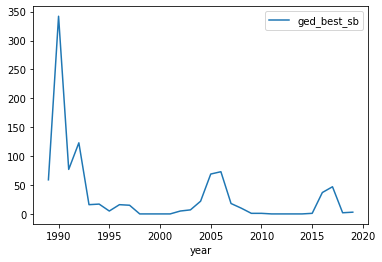

In [104]:
df_xsub_join.groupby('year').aggregate({'ged_best_sb':'sum'}).plot()

### DECO

In [105]:
df_deco = pd.read_csv(os.path.join(input_paths['ucdp'], 'DECO_v.1.0.csv'), header=0)
df_deco.head()

,id,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,side_a_new_id,side_a,side_b_new_id,side_b,country_id,...,electoral_side_a_inc,electoral_side_b,electoral_side_b_2,electoral_side_b_inc,electoral_perpetrator,electoral_targets,electoral_type,electoral_timing,relid,ucdp_ged
0,95,1,230,Yemen (North Yemen):Government,10855,123,Government of Yemen (North Yemen),1091,Ansarallah,678,...,1,Political supporters,NaN,0,2,2,2,2,YEM-2012-1-X2626-4,0
1,96,1,230,Yemen (North Yemen):Government,10855,123,Government of Yemen (North Yemen),1091,Ansarallah,678,...,1,Political supporters,NaN,0,2,6,2,2,YEM-2012-1-X2626-5,0
2,175,2,5036,Supporters of General Peoples Congress - Suppo...,5646,3425,Supporters of General Peoples Congress,2374,Supporters of Islah party,678,...,1,Political supporters,NaN,1,3,3,1,1,YEM-1997-2-X4857-1,0
3,265,1,230,Yemen (North Yemen):Government,10855,123,Government of Yemen (North Yemen),1091,Ansarallah,678,...,1,Political supporters,NaN,0,1,5,2,1,YEM-2012-1-X2626-2,0
4,266,1,230,Yemen (North Yemen):Government,10855,123,Government of Yemen (North Yemen),1091,Ansarallah,678,...,1,Political supporters,NaN,0,1,5,2,1,YEM-2012-1-X2626-3,0


In [106]:
# Subset
df_deco = df_deco[df_deco.country_id==771]

In [107]:
# Print columns
df_deco.columns

Index(['id', 'type_of_violence', 'conflict_new_id', 'conflict_name',
       'dyad_new_id', 'side_a_new_id', 'side_a', 'side_b_new_id', 'side_b',
       'country_id', 'country', 'region', 'source_article', 'year',
       'date_start', 'date_end', 'deaths_a', 'deaths_b', 'civilian_deaths',
       'unknown', 'best', 'high', 'low', 'latitude', 'longitude',
       'electoral_vio', 'electoral_vio_uncertainty', 'electoral_vio_source',
       'electoral_purpose', 'electoral_side_a', 'electoral_side_a_2',
       'electoral_side_a_inc', 'electoral_side_b', 'electoral_side_b_2',
       'electoral_side_b_inc', 'electoral_perpetrator', 'electoral_targets',
       'electoral_type', 'electoral_timing', 'relid', 'ucdp_ged'],
      dtype='object')

In [108]:
# Expand time
df_deco['start_date'] = pd.to_datetime(df_deco['date_start']).dt.to_period('M').dt.strftime('%Y-%m')
df_deco['end_date'] = pd.to_datetime(df_deco['date_end']).dt.to_period('M').dt.strftime('%Y-%m')

In [109]:
df_deco[df_deco['start_date'] !=df_deco['end_date']]

,id,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,side_a_new_id,side_a,side_b_new_id,side_b,country_id,...,electoral_side_b_2,electoral_side_b_inc,electoral_perpetrator,electoral_targets,electoral_type,electoral_timing,relid,ucdp_ged,start_date,end_date
1781,73546,2,4591,Supporters of Awami League - Supporters of BNP,5201,372,Supporters of Awami League,374,Supporters of BNP,771,...,NaN,0,3,3,1,1,BNG-2001-2-29-9,1,2001-07,2001-08
3223,157251,3,731,Government of Bangladesh - Civilians,1198,143,Government of Bangladesh,1,Civilians,771,...,NaN,0,1,3,1,3,BNG-2014-3-771-0,0,2014-04,2014-05
3663,210162,1,11350,Bangladesh:Government,12634,143,Government of Bangladesh,2765,Supporters of Jamaat-e-Islami,771,...,NaN,0,1,3,1,3,BNG-2015-1-12634-2,0,2015-01,2015-02
3963,231397,2,4591,Supporters of Awami League - Supporters of BNP,5201,372,Supporters of Awami League,374,Supporters of BNP,771,...,NaN,0,3,3,3,2,BNG-2016-2-29-5,0,2016-03,2016-05


In [110]:
# Expand time
df_deco['dateindx'] = df_deco.apply(lambda x: pd.date_range(x['start_date'], x['end_date'], freq='MS'),axis=1)
df_deco=df_deco.explode('dateindx')
df_deco['yrmo'] = df_deco.dateindx.dt.strftime('%Y-%m')
df_deco = df_deco.reset_index().drop('index',axis=1)
df_deco

,id,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,side_a_new_id,side_a,side_b_new_id,side_b,country_id,...,electoral_perpetrator,electoral_targets,electoral_type,electoral_timing,relid,ucdp_ged,start_date,end_date,dateindx,yrmo
0,71457,1,11350,Bangladesh:Government,12652,143,Government of Bangladesh,374,Supporters of BNP,771,...,3,5;6,1,1,BNG-2013-1-12652-0,0,2013-10,2013-10,2013-10-01,2013-10
1,71458,1,11350,Bangladesh:Government,12652,143,Government of Bangladesh,374,Supporters of BNP,771,...,3,5;6,1,1,BNG-2013-1-12652-1,0,2013-10,2013-10,2013-10-01,2013-10
2,71459,1,11350,Bangladesh:Government,12634,143,Government of Bangladesh,2765,Supporters of Jamaat-e-Islami,771,...,3,5;6,1,1,BNG-2013-1-12634-49,0,2013-10,2013-10,2013-10-01,2013-10
3,71460,1,11350,Bangladesh:Government,12652,143,Government of Bangladesh,374,Supporters of BNP,771,...,3,5;6,1,1,BNG-2013-1-12652-2,0,2013-10,2013-10,2013-10-01,2013-10
4,71461,2,4591,Supporters of Awami League - Supporters of BNP,5201,372,Supporters of Awami League,374,Supporters of BNP,771,...,3,3,1,1,BNG-2013-2-29-3,1,2013-10,2013-10,2013-10-01,2013-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,231395,2,4591,Supporters of Awami League - Supporters of BNP,5201,372,Supporters of Awami League,374,Supporters of BNP,771,...,3,3,3,2,BNG-2016-2-29-3,0,2016-05,2016-05,2016-05-01,2016-05
185,231396,2,4591,Supporters of Awami League - Supporters of BNP,5201,372,Supporters of Awami League,374,Supporters of BNP,771,...,3,3,3,2,BNG-2016-2-29-4,0,2016-05,2016-05,2016-05-01,2016-05
186,231397,2,4591,Supporters of Awami League - Supporters of BNP,5201,372,Supporters of Awami League,374,Supporters of BNP,771,...,3,3,3,2,BNG-2016-2-29-5,0,2016-03,2016-05,2016-03-01,2016-03
187,231397,2,4591,Supporters of Awami League - Supporters of BNP,5201,372,Supporters of Awami League,374,Supporters of BNP,771,...,3,3,3,2,BNG-2016-2-29-5,0,2016-03,2016-05,2016-04-01,2016-04


In [111]:
gdf_deco = gpd.GeoDataFrame(df_deco, geometry=gpd.points_from_xy(df_deco.longitude, df_deco.latitude)).set_crs("EPSG:4326")

In [112]:
gdf_deco_j = gpd.sjoin(gdf_deco, df_shp, how='left')

In [113]:
# Check whether merge was sucessful
gdf_deco_j[gdf_deco_j.NAME_2.isna()]

,id,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,side_a_new_id,side_a,side_b_new_id,side_b,country_id,...,electoral_timing,relid,ucdp_ged,start_date,end_date,dateindx,yrmo,geometry,index_right,NAME_2


In [114]:
# Make into seperate dfs
# Split df in to statebased, osv, nonstate violence 
df_deco_ns = gdf_deco_j[gdf_deco_j.type_of_violence==2]
df_deco_osv = gdf_deco_j[gdf_deco_j.type_of_violence==3]
df_deco_sb = gdf_deco_j[gdf_deco_j.type_of_violence==1]

In [115]:
df_deco_osv.columns

Index(['id', 'type_of_violence', 'conflict_new_id', 'conflict_name',
       'dyad_new_id', 'side_a_new_id', 'side_a', 'side_b_new_id', 'side_b',
       'country_id', 'country', 'region', 'source_article', 'year',
       'date_start', 'date_end', 'deaths_a', 'deaths_b', 'civilian_deaths',
       'unknown', 'best', 'high', 'low', 'latitude', 'longitude',
       'electoral_vio', 'electoral_vio_uncertainty', 'electoral_vio_source',
       'electoral_purpose', 'electoral_side_a', 'electoral_side_a_2',
       'electoral_side_a_inc', 'electoral_side_b', 'electoral_side_b_2',
       'electoral_side_b_inc', 'electoral_perpetrator', 'electoral_targets',
       'electoral_type', 'electoral_timing', 'relid', 'ucdp_ged', 'start_date',
       'end_date', 'dateindx', 'yrmo', 'geometry', 'index_right', 'NAME_2'],
      dtype='object')

In [116]:
# Aggregate events to admin - year month
df_deco_ns = df_deco_ns.groupby(['yrmo','NAME_2']).agg({
    'best':'sum', 
    #year':'max',
}).rename(columns={'best':'best_ns'})

df_deco_sb = df_deco_sb.groupby(['yrmo','NAME_2']).agg({
    'best':'sum', 
    #'year':'max',
}).rename(columns={'best':'best_sb'})

df_deco_osv = df_deco_osv.groupby(['yrmo','NAME_2']).agg({
    'civilian_deaths':'sum', 
    #'year':'max',
}).rename(columns={'civilian_deaths':'best_osv'})

In [117]:
df_deco_ns = df_deco_ns.add_prefix('deco_').reset_index()
df_deco_sb = df_deco_sb.add_prefix('deco_').reset_index()
df_deco_osv = df_deco_osv.add_prefix('deco_').reset_index()

In [118]:
df_deco_ns.head()

,yrmo,NAME_2,deco_best_ns
0,1991-01,Chittagong,2
1,1991-02,Chittagong,2
2,1991-02,Cox'S Bazar,1
3,1993-02,Dhaka,2
4,1993-02,Rajshahi,4


In [119]:
df_xsub_jnsd = df_xsub_join.merge(df_deco_ns,how='left',left_on=['yrmo','NAME_2'],right_on=['yrmo','NAME_2'])
df_xsub_josd = df_xsub_jnsd.merge(df_deco_osv,how='left',left_on=['yrmo','NAME_2'],right_on=['yrmo','NAME_2'])
df_xsub_joind = df_xsub_josd.merge(df_deco_sb,how='left',left_on=['yrmo','NAME_2'],right_on=['yrmo','NAME_2'])

print('Numbers of rows after join equals number of rows before join:', len(df_xsub_joind) == len(df_xsub_join))

df_xsub_joind

Numbers of rows after join equals number of rows before join: True


,ID_2,NAME_2,PG_GCP_PPP_LI,year,yrmo,geometry,gdis_n_disasters,gdis_disastertype_extreme_temp,gdis_disastertype_flood,gdis_disastertype_landslide,...,spei_12,flood_SEVERITY,flood_ID,flood_dummy,ged_best_ns,ged_best_osv,ged_best_sb,deco_best_ns,deco_best_osv,deco_best_sb
0,1,Barisal,0.000000,1989,1989-01,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,Barisal,0.000000,1989,1989-02,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,Barisal,0.000000,1989,1989-03,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN
3,1,Barisal,0.000000,1989,1989-04,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,Barisal,0.000000,1989,1989-05,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23803,64,Sylhet,1.808422,2019,2019-08,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,...,-0.945959,0.0,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN
23804,64,Sylhet,1.808422,2019,2019-09,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,...,-0.515529,0.0,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN
23805,64,Sylhet,1.808422,2019,2019-10,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,...,0.002309,0.0,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN
23806,64,Sylhet,1.808422,2019,2019-11,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,...,0.033580,0.0,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN


In [120]:
# Fill NAs before 2017 with 0 - and extrapolate after. 
df_xsub_joind.loc[df_xsub_joind.year<2018,['deco_best_ns','deco_best_osv','deco_best_sb']] = df_xsub_joind[df_xsub_joind.year<2018][['deco_best_ns','deco_best_osv','deco_best_sb']].fillna(0)

In [121]:
df_xsub_joind = df_xsub_joind.set_index('year')
df_xsub_joind.loc[2018,'deco_best_ns'] = df_xsub_joind.loc[2014, 'deco_best_ns'].values
df_xsub_joind.loc[2018,'deco_best_sb'] = df_xsub_joind.loc[2014, 'deco_best_sb'].values
df_xsub_joind.loc[2018,'deco_best_osv'] = df_xsub_joind.loc[2014, 'deco_best_osv'].values
df_xsub_joind = df_xsub_joind.reset_index()

In [122]:
if False:
    from scipy import interpolate
    extrap_ns = []
    extrap_osv = []
    extrap_sb = []
    for i in df_xsub_joind.ID_2.unique():
        #print(i)
        #print(df_grouped)


        df_grouped = df_xsub_gr[df_xsub_gr.ID_2 ==i]

        df_xsub_gr.loc[:,'timeind'] = list(range(0,len(df_xsub_gr)))

        df_trend = df_grouped[df_grouped.year<2015]
        df_extra = df_grouped[df_grouped.year>2017]

        f_ns = interpolate.interp1d(df_trend.timeind, df_trend.deco_best_sb,fill_value="extrapolate")
        f_osv = interpolate.interp1d(df_trend.timeind, df_trend.deco_best_osv,fill_value="extrapolate")
        f_sb = interpolate.interp1d(df_trend.timeind, df_trend.deco_best_ns,fill_value="extrapolate")

        extrap_ns.extend(list(f_ns(df_extra.timeind)))
        extrap_osv.extend(list(f_osv(df_extra.timeind)))
        extrap_sb.extend(list(f_sb(df_extra.timeind)))

In [123]:
if False:
    df_xsub_joind.loc[df_xsub_joind.deco_best_sb.isnull(),'deco_best_sb'] = extrap_sb
    df_xsub_joind.loc[df_xsub_joind.deco_best_ns.isnull(),'deco_best_ns'] = extrap_ns
    df_xsub_joind.loc[df_xsub_joind.deco_best_osv.isnull(),'deco_best_osv'] = extrap_osv

### ACLED


In [124]:
# Read df.
df_acled = pd.read_excel(os.path.join(input_paths['acled'], 'Asia_2010-2019_May04.xlsx'), header=0)
print(df_acled.columns)
df_acled

Index(['ISO', 'EVENT_ID_CNTY', 'EVENT_ID_NO_CNTY', 'EVENT_DATE', 'YEAR',
       'TIME_PRECISION', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'REGION', 'COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3',
       'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'SOURCE',
       'SOURCE_SCALE', 'NOTES', 'FATALITIES', 'TIMESTAMP'],
      dtype='object')


,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,4,AFG1,1,2017-01-01,2017,1,Battles,Armed clash,Military Forces of Afghanistan (2004-),NaN,...,NaN,Abjosh,33.848,68.831,1,Afghan Islamic Press,National,"Jan 1, 2017: Afghan military killed at least 2...",20,1552577124
1,4,AFG2,2,2017-01-01,2017,2,Battles,Armed clash,Military Forces of Afghanistan (2004-),NaN,...,NaN,Almar,35.846,64.531,2,Radio Fariab;,Subnational,Reported 1 Jan 2017: Afghan military 'foiled a...,0,1552577124
2,4,AFG3,3,2017-01-01,2017,1,Battles,Armed clash,Taliban,NaN,...,NaN,Baraki Barak,33.969,68.945,2,Voice of Jihad website;,Other-local,1 Jan 2017: Clash between Taliban and 'enemy f...,2,1552577124
3,4,AFG4,4,2017-01-01,2017,1,Battles,Armed clash,Unidentified Armed Group (Afghanistan),NaN,...,NaN,Burka,36.222,69.150,2,Afghan Islamic Press;,National,"Reported on 2 Jan, 2017: 3 days of clashes bet...",0,1552577124
4,4,AFG7,7,2017-01-01,2017,2,Battles,Armed clash,Military Forces of Afghanistan (2004-),NaN,...,NaN,Dih Bala,34.092,70.469,2,Radio Afghanistan;,Subnational,Reported on 1 Jan 2017: Security forces destro...,4,1552577124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168821,764,THA7176,7176,2019-05-01,2019,1,Protests,Peaceful protest,Protesters (Thailand),Labour Group (Thailand),...,NaN,Bangkok,13.754,100.501,1,Nation (Thailand),National,"On May 1, 2019, thousands of Thai workers marc...",0,1557236605
168822,764,THA7177,7177,2019-05-02,2019,1,Battles,Armed clash,Malay Muslim Separatists (Thailand),NaN,...,NaN,Bang Khao,6.832,101.131,1,Bangkok Post,National,"On May 2, 2019, a clash took place between Tha...",1,1557236605
168823,764,THA7180,7180,2019-05-03,2019,1,Battles,Armed clash,Malay Muslim Separatists (Thailand),NaN,...,NaN,Dusongyo,6.137,101.640,1,Manager (Thailand),National,"On May 3, 2019, a clash broke out between Thai...",0,1557236605
168824,764,THA7178,7178,2019-05-03,2019,1,Violence against civilians,Attack,Unidentified Armed Group (Thailand),NaN,...,NaN,Na Pho,10.193,99.115,1,Khaosod,National,"On May 3, 2019, shots were fired at the reside...",0,1557236605


In [125]:
# Subset country.
df_acled = df_acled[df_acled.COUNTRY == 'Bangladesh']
df_acled

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
18416,50,BGD7245,7245,2010-01-01,2010,1,Protests,Excessive force against protesters,Rioters (Bangladesh),AL: Bangladesh Awami League,...,Patuakhali,Patuakhali,22.368,90.346,2,The Daily Star,National,"On 1 Jan 2010, in Patuakhali district (Barisal...",0,1552577624
18417,50,BGD7244,7244,2010-01-01,2010,1,Battles,Armed clash,BCL: Bangladesh Chhatra League,Students (Bangladesh),...,Dhaka,Dhaka-Shahbagh,23.741,90.394,1,The Daily Star,National,"On 1 Jan 2010, in Dhaka City (Dhaka, Dhaka), f...",0,1552577624
18418,50,BGD7243,7243,2010-01-01,2010,1,Riots,Mob violence,Rioters (Bangladesh),AL: Bangladesh Awami League; Jubo League,...,Shailkupa,Shailkupa,23.684,89.242,2,The Daily Star,National,"On 1 Jan 2010, in Shailokupa upazila (Jhenaida...",0,1552577624
18419,50,BGD7241,7241,2010-01-01,2010,1,Protests,Peaceful protest,Protesters (Bangladesh),ICS: Islami Chhatra Shibir; Students (Bangladesh),...,Rajshahi,Rajshahi,24.374,88.601,1,Right Vision News,Regional,"On January 1, Shibir activists staged a protes...",0,1552577624
18420,50,BGD7242,7242,2010-01-01,2010,2,Riots,Violent demonstration,Rioters (Bangladesh),Students (Bangladesh),...,Rajshahi,Rajshahi,24.374,88.601,1,The Daily Star,National,"Assumed on 1 Jan 2010, in Rajshahi city (Rajsh...",0,1552577624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33244,50,BGD14989,14989,2019-05-01,2019,1,Battles,Armed clash,Pukuria Communal Militia (Bangladesh),NaN,...,Bhanga,Bhanga,23.368,89.990,2,Daily Star (Bangladesh),National,"On May 1, two groups of villagers engaged in a...",0,1557236601
33245,50,BGD14992,14992,2019-05-02,2019,1,Violence against civilians,Attack,Unidentified Armed Group (Bangladesh),NaN,...,Pangsha,Pangsha,23.770,89.440,2,Daily Star (Bangladesh),National,"On May 1, a local Awami League leader was kill...",1,1557236601
33246,50,BGD14991,14991,2019-05-02,2019,1,Protests,Peaceful protest,Protesters (Bangladesh),Students (Bangladesh); Teachers (Bangladesh); ...,...,Dhaka,Dhaka-Shahbagh,23.741,90.394,1,New Age (Bangladesh),National,"On May 2, students, teachers and other profess...",0,1557236601
33247,50,BGD14993,14993,2019-05-03,2019,1,Riots,Violent demonstration,Rioters (Bangladesh),Muslim Group (Bangladesh),...,Begumganj,Eklashpur,22.904,91.104,2,Daily Star (Bangladesh),National,"On May 3, local Muslims staged a demonstration...",0,1557236601


In [126]:
# Fix date column
# Note, in codebook it says that ACLED does not include events with lower precision than month
df_acled['yrmo'] = pd.to_datetime(df_acled.EVENT_DATE).dt.strftime('%Y-%m')
df_acled

/var/folders/4_/5tykrfk16l3_j0dx711k_cq00000gp/T/ipykernel_77704/2858558413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acled['yrmo'] = pd.to_datetime(df_acled.EVENT_DATE).dt.strftime('%Y-%m')


,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,yrmo
18416,50,BGD7245,7245,2010-01-01,2010,1,Protests,Excessive force against protesters,Rioters (Bangladesh),AL: Bangladesh Awami League,...,Patuakhali,22.368,90.346,2,The Daily Star,National,"On 1 Jan 2010, in Patuakhali district (Barisal...",0,1552577624,2010-01
18417,50,BGD7244,7244,2010-01-01,2010,1,Battles,Armed clash,BCL: Bangladesh Chhatra League,Students (Bangladesh),...,Dhaka-Shahbagh,23.741,90.394,1,The Daily Star,National,"On 1 Jan 2010, in Dhaka City (Dhaka, Dhaka), f...",0,1552577624,2010-01
18418,50,BGD7243,7243,2010-01-01,2010,1,Riots,Mob violence,Rioters (Bangladesh),AL: Bangladesh Awami League; Jubo League,...,Shailkupa,23.684,89.242,2,The Daily Star,National,"On 1 Jan 2010, in Shailokupa upazila (Jhenaida...",0,1552577624,2010-01
18419,50,BGD7241,7241,2010-01-01,2010,1,Protests,Peaceful protest,Protesters (Bangladesh),ICS: Islami Chhatra Shibir; Students (Bangladesh),...,Rajshahi,24.374,88.601,1,Right Vision News,Regional,"On January 1, Shibir activists staged a protes...",0,1552577624,2010-01
18420,50,BGD7242,7242,2010-01-01,2010,2,Riots,Violent demonstration,Rioters (Bangladesh),Students (Bangladesh),...,Rajshahi,24.374,88.601,1,The Daily Star,National,"Assumed on 1 Jan 2010, in Rajshahi city (Rajsh...",0,1552577624,2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33244,50,BGD14989,14989,2019-05-01,2019,1,Battles,Armed clash,Pukuria Communal Militia (Bangladesh),NaN,...,Bhanga,23.368,89.990,2,Daily Star (Bangladesh),National,"On May 1, two groups of villagers engaged in a...",0,1557236601,2019-05
33245,50,BGD14992,14992,2019-05-02,2019,1,Violence against civilians,Attack,Unidentified Armed Group (Bangladesh),NaN,...,Pangsha,23.770,89.440,2,Daily Star (Bangladesh),National,"On May 1, a local Awami League leader was kill...",1,1557236601,2019-05
33246,50,BGD14991,14991,2019-05-02,2019,1,Protests,Peaceful protest,Protesters (Bangladesh),Students (Bangladesh); Teachers (Bangladesh); ...,...,Dhaka-Shahbagh,23.741,90.394,1,New Age (Bangladesh),National,"On May 2, students, teachers and other profess...",0,1557236601,2019-05
33247,50,BGD14993,14993,2019-05-03,2019,1,Riots,Violent demonstration,Rioters (Bangladesh),Muslim Group (Bangladesh),...,Eklashpur,22.904,91.104,2,Daily Star (Bangladesh),National,"On May 3, local Muslims staged a demonstration...",0,1557236601,2019-05


In [127]:
# Geo-precision
# 3: provincial capital is used - thus would need to be applied to others too
print(df_acled.GEO_PRECISION.unique())

print(len(df_acled[df_acled.GEO_PRECISION==3])/len(df_acled)) # 0.0035 
df_acled[df_acled.GEO_PRECISION==3]

[2 1 3]
0.0035056967572304996


,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,yrmo
18518,50,BGD7339,7339,2010-01-13,2010,2,Riots,Violent demonstration,Rioters (Bangladesh),Labour Group (Bangladesh),...,Rajshahi,24.374,88.601,3,The Daily Star,National,"Assumed on 13 Jan 2010, in Rajshahi Division, ...",0,1552577623,2010-01
18882,50,BGD7720,7720,2010-02-22,2010,2,Strategic developments,Other,Civilians (Bangladesh),Refugees/IDPs (Bangladesh); Bengali Ethnic Gro...,...,Chittagong,22.357,91.782,3,The Daily Star; Indo-Asian News Service,National-Regional,"Displacement: At least 3,000 ethnic minorities...",0,1552577621,2010-02
22174,50,BGD11007,11007,2011-07-22,2011,1,Riots,Mob violence,Rioters (Bangladesh),BJSL: Bangladesh Jatiya Sramik League,...,Barisal,22.705,90.370,3,The Daily Star,National,"On July 22, at least 10 people were injured wh...",0,1552577531,2011-07
22476,50,BGD11309,11309,2011-09-10,2011,1,Violence against civilians,Attack,Police Forces of India (2004-2014) Border Secu...,NaN,...,Sylhet,24.899,91.872,3,The Daily Star,National,"On Sep 10, a man was injured in the district a...",0,1552577529,2011-09
22516,50,BGD11345,11345,2011-09-14,2011,1,Battles,Armed clash,PBSP: Purba Banglar Sarbahara Party,NaN,...,Rajbari,23.760,89.646,3,United News of Bangladesh,National,"On Sep 14, two suspected militants were shot d...",2,1552577528,2011-09
23215,50,BGD12043,12043,2012-01-02,2012,1,Protests,Peaceful protest,Protesters (Bangladesh),BNP: Bangladesh Nationalist Party,...,Dhaka,23.710,90.407,3,The Daily Star,National,"On 2 January, Bangladesh Nationalist Party (BN...",0,1552577524,2012-01
23281,50,BGD12117,12117,2012-01-11,2012,1,Protests,Peaceful protest,Protesters (Bangladesh),Students (Bangladesh),...,Chittagong,22.357,91.782,3,The Daily Star,National,"On 11 January, students of Gorib-e-Newaz High ...",0,1552577523,2012-01
23346,50,BGD12179,12179,2012-01-19,2012,1,Protests,Peaceful protest,Protesters (Bangladesh),Labour Group (Bangladesh),...,Dinajpur,25.627,88.638,3,The Daily Star,National,"On 19 January, Dinajpur unit of Bangladesh Dru...",0,1552577523,2012-01
23547,50,BGD12375,12375,2012-02-15,2012,1,Protests,Peaceful protest,Protesters (Bangladesh),Labour Group (Bangladesh),...,Khulna,22.848,89.539,3,The Daily Star,National,"On 15 February, production at seven state-owne...",0,1552577521,2012-02
23557,50,BGD12382,12382,2012-02-16,2012,1,Protests,Peaceful protest,Protesters (Bangladesh),Labour Group (Bangladesh),...,Khulna,22.848,89.539,3,The Daily Star,National,"On 16 February, production at seven state-owne...",0,1552577521,2012-02


In [128]:
# Check Nas
print('Nas admin2 level:', len(df_acled[df_acled.ADMIN2.isna()]))
print(df_acled[df_acled.ADMIN2.isna()].GEO_PRECISION)

print('Nas admin3 level:', len(df_acled[df_acled.ADMIN3.isna()]))
print(df_acled[df_acled.ADMIN3.isna()].GEO_PRECISION)

# Drop event with NA
df_acled = df_acled.dropna(subset=['ADMIN2'])

Nas admin2 level: 1
30955    2
Name: GEO_PRECISION, dtype: int64
Nas admin3 level: 1
30955    2
Name: GEO_PRECISION, dtype: int64


In [129]:
# Rename admin 2 based on x_sub
print(set(df_acled.ADMIN2.unique()) - set(df_xsub_join.NAME_2.unique()))
print(set(df_xsub_join.NAME_2.unique()) - set(df_acled.ADMIN2.unique()))
# Replace names.
df_acled.ADMIN2.replace({
    "Cox's Bazar":"Cox'S Bazar", 
    "Brahmanbaria":"Brahamanbaria",
}, inplace=True)
print(set(df_acled.ADMIN2.unique()) - set(df_xsub_join.NAME_2.unique()))
print(set(df_xsub_join.NAME_2.unique()) - set(df_acled.ADMIN2.unique()))

{'Brahmanbaria', "Cox's Bazar"}
{'Brahamanbaria', "Cox'S Bazar"}
set()
set()


/var/folders/4_/5tykrfk16l3_j0dx711k_cq00000gp/T/ipykernel_77704/992637747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acled.ADMIN2.replace({


In [130]:
# Drop events with strategic development / Explosions/Remotie violence
print(df_acled.EVENT_TYPE.unique())
df_acled = df_acled[~(df_acled.EVENT_TYPE.isin(["Strategic developments", "Explosions/Remote violence"]))]
print(df_acled.EVENT_TYPE.unique())


['Protests' 'Battles' 'Riots' 'Violence against civilians'
 'Strategic developments' 'Explosions/Remote violence']
['Protests' 'Battles' 'Riots' 'Violence against civilians']


In [131]:
# Aggregate
df_acled_agg = df_acled.groupby(['yrmo','ADMIN2','INTERACTION']).agg({
    'FATALITIES':'sum', 
    'EVENT_TYPE':'count',
    
})[['FATALITIES','EVENT_TYPE']].unstack()

df_acled_agg.columns = df_acled_agg.columns.get_level_values(1).astype(str) + '_' + df_acled_agg.columns.get_level_values(0).astype(str)
df_acled_agg.columns = df_acled_agg.columns.str.replace('FATALITIES','fat').str.replace('EVENT_TYPE','count')
df_acled_agg = df_acled_agg.fillna(0)

df_acled_agg

12_fat  13_fat  14_fat  15_fat  16_fat  17_fat  18_fat  \
yrmo    ADMIN2                                                                  
2010-01 Bagerhat          0.0     0.0     0.0     0.0     0.0     0.0     0.0   
        Bandarban         0.0     0.0     0.0     0.0     0.0     0.0     0.0   
        Barisal           0.0     0.0     0.0     0.0     0.0     0.0     0.0   
        Bhola             0.0     0.0     0.0     0.0     0.0     0.0     0.0   
        Brahamanbaria     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                       ...     ...     ...     ...     ...     ...     ...   
2019-05 Dhaka             0.0     0.0     0.0     0.0     0.0     0.0     0.0   
        Faridpur          0.0     0.0     0.0     0.0     0.0     0.0     0.0   
        Noakhali          0.0     0.0     0.0     0.0     0.0     0.0     0.0   
        Rajbari           0.0     0.0     0.0     0.0     0.0     0.0     0.0   
        Sherpur           0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                       23_fat  27_fat  33_fat  ...  47_count  48_count  \
yrmo    ADMIN2                                 ...                       
2010-01 Bagerhat          0.0     0.0     0.0  ...       0.0       0.0   
        Bandarban         0.0     0.0     0.0  ...       0.0       0.0   
        Barisal           0.0     0.0     0.0  ...       0.0       0.0   
        Bhola             0.0     0.0     0.0  ...       0.0       0.0   
        Brahamanbaria     0.0     0.0     0.0  ...       0.0       0.0   
...                       ...     ...     ...  ...       ...       ...   
2019-05 Dhaka             0.0     0.0     0.0  ...       0.0       0.0   
        Faridpur          0.0     0.0     0.0  ...       0.0       0.0   
        Noakhali          0.0     0.0     0.0  ...       0.0       0.0   
        Rajbari           0.0     0.0     0.0  ...       0.0       0.0   
        Sherpur           1.0     0.0     0.0  ...       0.0       0.0   

                       50_count  55_count  56_count  57_count  58_count  \
yrmo    ADMIN2                                                            
2010-01 Bagerhat            0.0       0.0       0.0       4.0       0.0   
        Bandarban           0.0       0.0       0.0       0.0       0.0   
        Barisal             0.0       4.0       0.0       1.0       0.0   
        Bhola               0.0       2.0       0.0       0.0       0.0   
        Brahamanbaria       0.0       0.0       0.0       1.0       0.0   
...                         ...       ...       ...       ...       ...   
2019-05 Dhaka               0.0       0.0       0.0       0.0       0.0   
        Faridpur            0.0       0.0       0.0       0.0       0.0   
        Noakhali            0.0       0.0       0.0       0.0       0.0   
        Rajbari             0.0       0.0       0.0       0.0       0.0   
        Sherpur             0.0       0.0       0.0       0.0       0.0   

                       60_count  66_count  78_count  
yrmo    ADMIN2                                       
2010-01 Bagerhat            0.0       0.0       0.0  
        Bandarban           1.0       0.0       0.0  
        Barisal             1.0       0.0       0.0  
        Bhola               0.0       0.0       0.0  
        Brahamanbaria       0.0       0.0       0.0  
...                         ...       ...       ...  
2019-05 Dhaka               2.0       0.0       0.0  
        Faridpur            0.0       0.0       0.0  
        Noakhali            0.0       0.0       0.0  
        Rajbari             0.0       0.0       0.0  
        Sherpur             0.0       0.0       0.0  

[4112 rows x 52 columns]

In [132]:
# Add prefix
df_acled_agg = df_acled_agg.add_prefix('acled_')
df_acled_agg

acled_12_fat  acled_13_fat  acled_14_fat  acled_15_fat  \
yrmo    ADMIN2                                                                  
2010-01 Bagerhat                0.0           0.0           0.0           0.0   
        Bandarban               0.0           0.0           0.0           0.0   
        Barisal                 0.0           0.0           0.0           0.0   
        Bhola                   0.0           0.0           0.0           0.0   
        Brahamanbaria           0.0           0.0           0.0           0.0   
...                             ...           ...           ...           ...   
2019-05 Dhaka                   0.0           0.0           0.0           0.0   
        Faridpur                0.0           0.0           0.0           0.0   
        Noakhali                0.0           0.0           0.0           0.0   
        Rajbari                 0.0           0.0           0.0           0.0   
        Sherpur                 0.0           0.0           0.0           0.0   

                       acled_16_fat  acled_17_fat  acled_18_fat  acled_23_fat  \
yrmo    ADMIN2                                                                  
2010-01 Bagerhat                0.0           0.0           0.0           0.0   
        Bandarban               0.0           0.0           0.0           0.0   
        Barisal                 0.0           0.0           0.0           0.0   
        Bhola                   0.0           0.0           0.0           0.0   
        Brahamanbaria           0.0           0.0           0.0           0.0   
...                             ...           ...           ...           ...   
2019-05 Dhaka                   0.0           0.0           0.0           0.0   
        Faridpur                0.0           0.0           0.0           0.0   
        Noakhali                0.0           0.0           0.0           0.0   
        Rajbari                 0.0           0.0           0.0           0.0   
        Sherpur                 0.0           0.0           0.0           1.0   

                       acled_27_fat  acled_33_fat  ...  acled_47_count  \
yrmo    ADMIN2                                     ...                   
2010-01 Bagerhat                0.0           0.0  ...             0.0   
        Bandarban               0.0           0.0  ...             0.0   
        Barisal                 0.0           0.0  ...             0.0   
        Bhola                   0.0           0.0  ...             0.0   
        Brahamanbaria           0.0           0.0  ...             0.0   
...                             ...           ...  ...             ...   
2019-05 Dhaka                   0.0           0.0  ...             0.0   
        Faridpur                0.0           0.0  ...             0.0   
        Noakhali                0.0           0.0  ...             0.0   
        Rajbari                 0.0           0.0  ...             0.0   
        Sherpur                 0.0           0.0  ...             0.0   

                       acled_48_count  acled_50_count  acled_55_count  \
yrmo    ADMIN2                                                          
2010-01 Bagerhat                  0.0             0.0             0.0   
        Bandarban                 0.0             0.0             0.0   
        Barisal                   0.0             0.0             4.0   
        Bhola                     0.0             0.0             2.0   
        Brahamanbaria             0.0             0.0             0.0   
...                               ...             ...             ...   
2019-05 Dhaka                     0.0             0.0             0.0   
        Faridpur                  0.0             0.0             0.0   
        Noakhali                  0.0             0.0             0.0   
        Rajbari                   0.0             0.0             0.0   
        Sherpur                   0.0             0.0             0.0   

  

In [133]:
# Define ACLED categories

# Protests with excessive violence
df_acled_agg['acled_prex_fat'] = df_acled_agg.acled_16_fat + df_acled_agg.acled_36_fat
df_acled_agg['acled_prex_count'] = df_acled_agg.acled_16_count + df_acled_agg.acled_36_count

# Riots 
df_acled_agg['acled_prrio_fat'] = df_acled_agg.acled_50_fat + df_acled_agg.acled_55_fat + df_acled_agg.acled_56_fat + df_acled_agg.acled_57_fat + df_acled_agg.acled_58_fat + df_acled_agg.acled_15_fat + df_acled_agg.acled_35_fat + df_acled_agg.acled_45_fat
df_acled_agg['acled_prrio_count'] = df_acled_agg.acled_50_count + df_acled_agg.acled_55_count + df_acled_agg.acled_56_count + df_acled_agg.acled_57_count + df_acled_agg.acled_58_count + df_acled_agg.acled_15_count + df_acled_agg.acled_35_count + df_acled_agg.acled_45_count


In [134]:
# Merge CHECK AGAIN

df_xsub_joined = df_xsub_joind.merge(df_acled_agg[['acled_prex_fat','acled_prex_count','acled_prrio_fat','acled_prrio_count']].reset_index(),how='left',left_on=['yrmo','NAME_2'],right_on=['yrmo','ADMIN2'])

print('Numbers of rows after join equals number of rows before join:', len(df_xsub_joined) == len(df_xsub_joind))

df_xsub_joined = df_xsub_joined.fillna(0).drop('ADMIN2',axis=1)
df_xsub_joined

Numbers of rows after join equals number of rows before join: True


,year,ID_2,NAME_2,PG_GCP_PPP_LI,yrmo,geometry,gdis_n_disasters,gdis_disastertype_extreme_temp,gdis_disastertype_flood,gdis_disastertype_landslide,...,ged_best_ns,ged_best_osv,ged_best_sb,deco_best_ns,deco_best_osv,deco_best_sb,acled_prex_fat,acled_prex_count,acled_prrio_fat,acled_prrio_count
0,1989,1,Barisal,0.000000,1989-01,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1989,1,Barisal,0.000000,1989-02,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1989,1,Barisal,0.000000,1989-03,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1989,1,Barisal,0.000000,1989-04,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1989,1,Barisal,0.000000,1989-05,"MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23803,2019,64,Sylhet,1.808422,2019-08,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23804,2019,64,Sylhet,1.808422,2019-09,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23805,2019,64,Sylhet,1.808422,2019-10,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23806,2019,64,Sylhet,1.808422,2019-11,"POLYGON ((92.38098 24.86759, 92.37892 24.86787...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Plot GED

fig_scale=1
save_fig = True
name = 'ged_yearly_2011_2018'

# Set up figure space.
fig = plt.figure(figsize=(20 * fig_scale, 7.5 * fig_scale))
ax = fig.add_subplot(111)

# Format grid lines.
ax.grid(
    which="major",
    axis="y",
    linestyle="--",
    dashes=(2, 3),
    lw=1,
    color="black",
    alpha=0.2,
)

# Remove plot framelines.
for spine in plt.gca().spines.values():
    spine.set_visible(False)
labels = [item for item in ax.get_xticklabels()]
    
df_xsub_joined.loc[(df_xsub_joined['year']>2011) & (df_xsub_joined['year']<2019)].groupby('year').aggregate({'ged_best_sb':'sum','ged_best_ns':'sum','ged_best_osv':'sum'}).plot(ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('BRD')

plt.grid(axis = 'x', linewidth=0.5)
ax.legend(labels=['GED state-based violence','GED non-state violence','GED one-sided violence'])

if save_fig:
    fig.savefig(os.path.join(output_path2,f'lineplot_{name}.png'), bbox_inches="tight", dpi=400, transparent=False)
    print(f"Wrote to path.")
    plt.show(fig)

In [ ]:
# Plot GED

fig_scale=1
save_fig = True
name = 'deco_yearly_2011_2018'

# Set up figure space.
fig = plt.figure(figsize=(20 * fig_scale, 7.5 * fig_scale))
ax = fig.add_subplot(111)

# Format grid lines.
ax.grid(
    which="major",
    axis="y",
    linestyle="--",
    dashes=(2, 3),
    lw=1,
    color="black",
    alpha=0.2,
)

# Remove plot framelines.
for spine in plt.gca().spines.values():
    spine.set_visible(False)
labels = [item for item in ax.get_xticklabels()]
    
df_xsub_joined.loc[(df_xsub_joined['year']>2011) & (df_xsub_joined['year']<2019)].groupby('year').aggregate({'deco_best_sb':'sum','deco_best_ns':'sum','deco_best_osv':'sum'}).plot(ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('BRD')

plt.grid(axis = 'x', linewidth=0.5)
ax.legend(labels=['DECO state-based violence','DECO non-state violence','DECO one-sided violence'])

if save_fig:
    fig.savefig(os.path.join(output_path2,f'lineplot_{name}.png'), bbox_inches="tight", dpi=400, transparent=False)
    print(f"Wrote to path.")
    plt.show(fig)

Wrote to path.


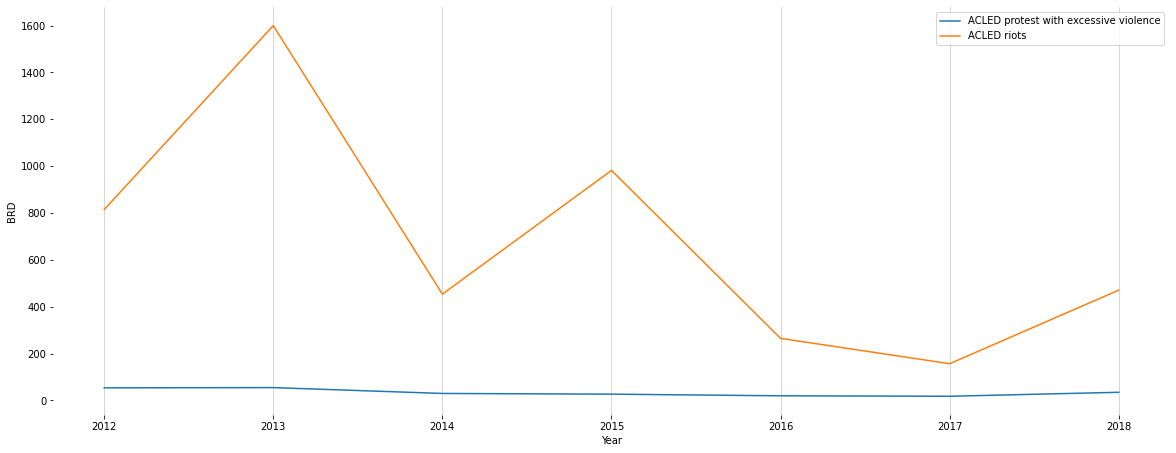

In [135]:
# Plot GED

fig_scale=1
save_fig = True
name = 'acled_yearly_2011_2018'

# Set up figure space.
fig = plt.figure(figsize=(20 * fig_scale, 7.5 * fig_scale))
ax = fig.add_subplot(111)

# Format grid lines.
ax.grid(
    which="major",
    axis="y",
    linestyle="--",
    dashes=(2, 3),
    lw=1,
    color="black",
    alpha=0.2,
)

# Remove plot framelines.
for spine in plt.gca().spines.values():
    spine.set_visible(False)
labels = [item for item in ax.get_xticklabels()]
    
df_xsub_joined.loc[(df_xsub_joined['year']>2011) & (df_xsub_joined['year']<2019)].groupby('year').aggregate({'acled_prex_count':'sum','acled_prrio_count':'sum'}).plot(ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('BRD')

plt.grid(axis = 'x', linewidth=0.5)
ax.legend(labels=['ACLED protest with excessive violence','ACLED riots'])

if save_fig:
    fig.savefig(os.path.join(output_path2,f'lineplot_{name}.png'), bbox_inches="tight", dpi=400, transparent=False)
    print(f"Wrote to path.")
    plt.show(fig)

In [ ]:
# Plot over districts
if False:
    year_to_plot=2016
    test = df_xsub_joined.groupby(['NAME_2','year']).aggregate({'ged_best_sb':'sum'}).reset_index()
    merged = test.merge(df_shp,how='left',left_on='NAME_2',right_on='NAME_2')
    merged = merged[merged.year == year_to_plot]
    print(merged.ged_best_sb.sum())
    print(merged.ged_best_sb.max())
    merged.set_geometry('geometry').plot(column = 'ged_best_sb', legend = True)

In [ ]:
if False:
    fig, ax = plt.subplots(figsize = (15,15))
    df_shp.plot(column = 'NAME_2', legend = True, ax=ax)

In [ ]:
# Plot ACLED
if True:
    df_xsub_joined.loc[(df_xsub_joined['year']>2009) & (df_xsub_joined['year']<2020)].groupby('year').aggregate({'acled_prex_count':'sum','acled_prrio_count':'sum'}).plot()
    

### GEO EPR

In [ ]:
if False:
    df_geopr = gpd.read_file(os.path.join(input_paths['geopr'], 'GeoEPR-2021.shp'), header=0)
    df_geopr

In [ ]:
if False:
    # Filter
    df_geopr = df_geopr[df_geopr.statename=='Bangladesh']
    df_geopr

In [ ]:
if False:
    # Check groups
    df_geopr = gpd.GeoDataFrame(df_geopr, geometry='geometry')
    df_geopr.plot('group')

In [ ]:
if False:
    # Add area for intersections
    df_xsub_joined['geopr_buddhists_area'] = df_xsub_joined.apply(lambda row: df_geopr.iloc[1].geometry.intersection(row['geometry']).area, axis=1)

In [ ]:
if False:
    # Check whether this looks good.
    df_xsub_joined[df_xsub_joined.geopr_buddhists_area>0].NAME_2.unique()

In [ ]:
if False:
    # Add dummy for districts: Bandarban, Khagrachhari, Rangamati
    dis = ['Bandarban','Khagrachhari','Rangamati']
    df_xsub_joined['geopr_buddhists'] = np.where(df_xsub_joined.NAME_2.isin(dis),1,0)

In [ ]:
if False:
    # Check whether this looks good.
    df_xsub_joined[df_xsub_joined.geopr_buddhists==1].NAME_2.unique()

### Population

- Check: not unique values

In [ ]:
if False:
    # Population
    df_pop = pd.read_csv(os.path.join(input_paths['pop'], 'population_clean.csv'), header=0)
    df_pop

In [ ]:
if False:
    df_pop = df_pop.groupby(['NAME2','year']).aggregate({'popsize':'sum'}).reset_index()
    df_pop

In [ ]:
if False:
    # Compare district names. 
    print('Names match between dfs:', set(df_pop.NAME2.unique()) == set(df_xsub_joined.NAME_2.unique()))
    print('Names df_ged', sorted(set(df_pop.NAME2.unique()) - set(df_xsub_joined.NAME_2.unique())))
    print('Names df_xsub', sorted(set(df_xsub_joined.NAME_2.unique()) - set(df_pop.NAME2.unique())))

In [ ]:
if False:
    # Rename admin 2 based on x_sub
    # Replace names.
    df_pop.NAME2.replace({
        "Brahmanbaria":"Brahamanbaria", 
        "Chapai Nawabganj":"Nawabganj",
        "Cox's Bazar": "Cox'S Bazar",
        "Kishoregonj":"Kishoreganj",
    }, inplace=True)
    print(set(df_pop.NAME2.unique()) - set(df_xsub_joined.NAME_2.unique()))
    print(set(df_xsub_joined.NAME_2.unique()) - set(df_pop.NAME2.unique()))

In [ ]:
if False:
    # Rename
    df_pop = df_pop.rename(columns={'NAME2':'NAME_2'})

In [ ]:
if False:
    df_xsub_joined.columns

In [ ]:
if False:
    #Join
    df_xsub_joined_f = df_xsub_joined.merge(df_pop,how='left',left_on=['year','NAME_2'],right_on=['year','NAME_2'])
    print(len(df_xsub_joined_f)==len(df_xsub_joined))
    df_xsub_joined_f

In [ ]:
if False:
    df_xsub_joined_f['popsize'] = df_xsub_joined_f.popsize.fillna(0)
    df_xsub_joined_f

### Spatial transformations

In [ ]:
# To shapefile for spatial transforms
gdf_xsub = gpd.GeoDataFrame(df_xsub_joined, geometry='geometry')

gdf_xsub

#### Spatial lags

In [ ]:
def spatial_lag(
    gdf: gpd.GeoDataFrame, 
    gdf_geom: gpd.GeoDataFrame, 
    groupby: str,
    col: str,
):
    """ Compute spatial lag on col in gdf """

    def gdf_to_w_q(gdf_geom: gpd.GeoDataFrame):
        """Build queen weights from gdf.
        """
        # Compute first order spatial weight
        w = lps.weights.Queen.from_dataframe(gdf_geom, geom_col="geometry")

        return w

    def _splag(y: Any, w: Any):
        """ Flip argument order for transform """
        return lps.weights.lag_spatial(w, y)
    
    w = gdf_to_w_q(gdf_geom)
    s = gdf.groupby(groupby)[col].transform(_splag, w=w)
    return s

In [ ]:
# Check queen weights
skeleton = gdf_xsub[gdf_xsub.yrmo == '2018-01']
skeleton['new'] = range(0, len(skeleton))
skeleton = skeleton.set_index('new')
sk_weights = lps.weights.Queen.from_dataframe(skeleton, geom_col="geometry")

#Plot 

plt.rcParams["figure.figsize"] = (20,8)
ax = skeleton.plot(edgecolor='grey', facecolor='w')
f,ax = sk_weights.plot(skeleton, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [ ]:
gdf_xsub

In [ ]:
# Add spatial lags.
cols_splag = [
    'ged_best_ns',
    'ged_best_osv',
    'ged_best_sb',
    'deco_best_ns',
    'deco_best_osv',
    'deco_best_sb',
    'gdis_n_disasters',
    'gdis_disastertype_extreme_temp',
    'gdis_disastertype_flood',
    'gdis_disastertype_landslide',
    'gdis_disastertype_storm',
    #'gdis_disastertype_drought',
    'gdis_disastertype_earthquake',
    'flood_dummy',
    'acled_prex_count',
    'acled_prrio_count',
    'acled_prex_fat',
    'acled_prrio_fat',
]

# Spatial lag for all conflict variables. 
for colname in cols_splag:
    gdf_xsub[f'{colname}_splag1'] = spatial_lag(
        gdf = gdf_xsub, 
        gdf_geom = skeleton, 
        groupby= 'yrmo',
        col = colname,
    )

In [ ]:
if False:
    for col in gdf_xsub.columns:
        print(f'{col}')
        print(gdf_xsub[f'{col}'].isna().any())

### Temporal transformations

In [ ]:
gdf_xsub = gdf_xsub.set_index(['NAME_2','yrmo'])

In [ ]:
gdf_xsub

In [ ]:
gdf_xsub.columns

In [ ]:
cols_ts = [
    'ged_best_ns',
    'ged_best_osv',
    'ged_best_sb',
    'deco_best_ns',
    'deco_best_osv',
    'deco_best_sb',
    'gdis_n_disasters',
    'gdis_disastertype_extreme_temp',
    'gdis_disastertype_flood',
    'gdis_disastertype_landslide',
    'gdis_disastertype_storm',
    #'gdis_disastertype_drought',
    'gdis_disastertype_earthquake',
    'flood_dummy',
    'acled_prex_count',
    'acled_prrio_count',
    'acled_prex_fat',
    'acled_prrio_fat',
]

splagcols = []
for col in cols_ts:
    splagcols.append(f'{col}_splag1')

colsts = splagcols + cols_ts
print(colsts)

for colname in colsts:
    gdf_xsub[f'{colname}_ts'] = gdf_xsub[f'{colname}'].groupby(level=0).apply(fun.time_since)
    
gdf_xsub

In [ ]:
# Add decay
cols_ts = [
    'ged_best_ns_ts',
    'ged_best_osv_ts',
    'ged_best_sb_ts',
    'deco_best_ns_ts',
    'deco_best_osv_ts',
    'deco_best_sb_ts',
    'gdis_n_disasters_ts',
    'gdis_disastertype_extreme_temp_ts',
    'gdis_disastertype_flood_ts',
    'gdis_disastertype_landslide_ts',
    'gdis_disastertype_storm_ts',
    #'gdis_disastertype_drought_ts',
    'gdis_disastertype_earthquake_ts',
    'flood_dummy_ts',
    'acled_prex_count_ts',
    'acled_prrio_count_ts',
    'acled_prex_fat_ts',
    'acled_prrio_fat_ts',
    'ged_best_ns_splag1_ts',
    'ged_best_osv_splag1_ts',
    'ged_best_sb_splag1_ts',
    'deco_best_ns_splag1_ts',
    'deco_best_osv_splag1_ts',
    'deco_best_sb_splag1_ts',
    'gdis_n_disasters_splag1_ts',
    'gdis_disastertype_extreme_temp_splag1_ts',
    'gdis_disastertype_flood_splag1_ts',
    'gdis_disastertype_landslide_splag1_ts',
    'gdis_disastertype_storm_splag1_ts',
    #'gdis_disastertype_drought_splag1_ts',
    'gdis_disastertype_earthquake_splag1_ts',
    'flood_dummy_splag1_ts',
    'acled_prex_count_splag1_ts',
    'acled_prrio_count_splag1_ts',
    'acled_prex_fat_splag1_ts',
    'acled_prrio_fat_splag1_ts',
]

#splagcols = []
#for col in cols_ts:
    #splagcols.append(f'{col}_splag1_ts')

colsts = cols_ts
print(colsts)

for colname in colsts:
    gdf_xsub[f'{colname}_decay_6'] = fun.decay(gdf_xsub[f'{colname}'], 6)
    gdf_xsub[f'{colname}_decay_12'] = fun.decay(gdf_xsub[f'{colname}'], 12)
    
gdf_xsub

In [ ]:
# Moving sum over x months
cols_ts = [
    'ged_best_ns',
    'ged_best_osv',
    'ged_best_sb',
    'deco_best_ns',
    'deco_best_osv',
    'deco_best_sb',
    'gdis_n_disasters',
    'gdis_disastertype_extreme_temp',
    'gdis_disastertype_flood',
    'gdis_disastertype_landslide',
    'gdis_disastertype_storm',
    #'gdis_disastertype_drought',
    'gdis_disastertype_earthquake',
    'flood_dummy',
    'acled_prex_count',
    'acled_prrio_count',
    'acled_prex_fat',
    'acled_prrio_fat',
]

splagcols = []
for col in cols_ts:
    splagcols.append(f'{col}_splag1')

colsts = splagcols + cols_ts
print(colsts)

times = [12]

for colname in colsts:
    for time in times:
        gdf_xsub[f'{colname}_msum_{time}'] = fun.moving_sum(gdf_xsub[f'{colname}'],time=time)
    
gdf_xsub

In [ ]:
# Moving average over x months
cols_ts = [
    'ged_best_ns',
    'ged_best_osv',
    'ged_best_sb',
    'deco_best_ns',
    'deco_best_osv',
    'deco_best_sb',
    'gdis_n_disasters',
    'gdis_disastertype_extreme_temp',
    'gdis_disastertype_flood',
    'gdis_disastertype_landslide',
    'gdis_disastertype_storm',
    #'gdis_disastertype_drought',
    'gdis_disastertype_earthquake',
    'flood_dummy',
    'acled_prex_count',
    'acled_prrio_count',
    'acled_prex_fat',
    'acled_prrio_fat',
]

splagcols = []
for col in cols_ts:
    splagcols.append(f'{col}_splag1')

colsts = splagcols + cols_ts
print(colsts)


times = [12]

for colname in colsts:
    for time in times:
        gdf_xsub[f'{colname}_mavg_{time}'] = fun.moving_avg(gdf_xsub[f'{colname}'],time=time)
    
gdf_xsub

In [ ]:
# Lags
cols_tlag = [
    'ged_best_ns',
    'ged_best_osv',
    'ged_best_sb',
    'deco_best_ns',
    'deco_best_osv',
    'deco_best_sb',
    'gdis_n_disasters',
    'gdis_disastertype_extreme_temp',
    'gdis_disastertype_flood',
    'gdis_disastertype_landslide',
    'gdis_disastertype_storm',
    #'gdis_disastertype_drought',
    'gdis_disastertype_earthquake',
    'flood_dummy',
    'acled_prex_count',
    'acled_prrio_count',
    'acled_prex_fat',
    'acled_prrio_fat',
]

splagcols = []
for col in cols_tlag:
    splagcols.append(f'{col}_splag1')
    splagcols.append(f'{col}_splag1_ts')
    splagcols.append(f'{col}_splag1_ts_decay_6')
    splagcols.append(f'{col}_ts_decay_6')
    splagcols.append(f'{col}_splag1_ts_decay_12')
    splagcols.append(f'{col}_ts_decay_12')
    splagcols.append(f'{col}_ts')
    #splagcols.append(f'{col}_msum_3')
    #splagcols.append(f'{col}_msum_6')
    splagcols.append(f'{col}_msum_12')
    #splagcols.append(f'{col}_mavg_3')
    #splagcols.append(f'{col}_mavg_6')
    splagcols.append(f'{col}_mavg_12')
    #splagcols.append(f'{col}_splag1_msum_3')
    #splagcols.append(f'{col}_splag1_msum_6')
    splagcols.append(f'{col}_splag1_msum_12')

colst_tlagall = splagcols + cols_tlag + ['spei_3',
    'spei_6',
    'spei_12']

lags = [1,3,6,12]

for colname in colst_tlagall:
    for lag in lags:
        gdf_xsub[f'{colname}_tlag{lag}'] = gdf_xsub[f'{colname}'].groupby(level=0).shift(lag).fillna(0)

## Export

In [ ]:
# Export
gdf_xsub.to_csv(os.path.join(output_path,'external_district_Nov29_df.csv.zip'),header=True,compression="zip")

## Explore

In [ ]:
gdf_xsub.reset_index().groupby(['year'])['deco_best_ns'].aggregate('sum').plot(color='blue')
gdf_xsub.reset_index().groupby(['year'])['deco_best_sb'].aggregate('sum').plot(color='red')
gdf_xsub.reset_index().groupby(['year'])['deco_best_osv'].aggregate('sum').plot(color='green')

In [ ]:
gdf_xsub.reset_index().groupby(['year'])['deco_best_osv'].aggregate('sum')

In [ ]:
gdf_xsub.reset_index().groupby(['year'])['deco_best_ns'].aggregate('sum')